---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 3

---

Please write your full name here
- **Name** : "Nouran Mahmoud Mahmoud"

In [ ]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)

### Part 1
Run the following cells to download fmnist dataset which will be used for the rest of the assignment.

In [ ]:
!pip install openml

# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.0 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.2-py3-none-any.whl size=158699 sha256=c0e08eb1e87732e486fef7f8fc15b7016dc43ae1c21318bf143b88c2a51dea54
  Stored in directory: /root/.cache/pip/wheels/2e/4e/af/5e721761d86375dbca82e63cc2470019e97815bc39f11451ea
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=5392914a6e95433c806b88e2c42f7cfdd189a99352e20e27c7fa253e4f39137a
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built

In [ ]:
# Download FMINST data. Takes a while the first time.
fmnist = oml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute);
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal",
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

<ipython-input-3-00dc9b2e0d7e>:2: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  fmnist = oml.datasets.get_dataset(40996)


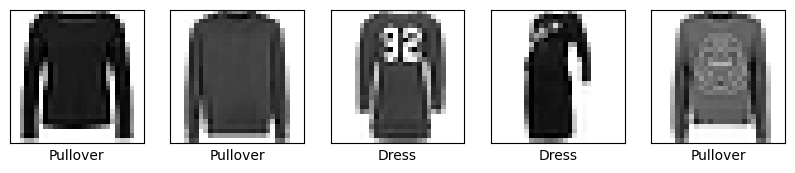

In [ ]:
# Take some random examples, reshape to a 32x32 image and plot
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X.values[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[int(y.values[n])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show()

### Question 1
First, we'll try the default Logistic Regression and k-Nearest Neighbors as a point of reference. To see whether our models are overfitting, we also evaluate the training set error. This can be done using cross_validation.

Implement the following `evaluate_learners` function which evaluates each classifier passed into it on the given data, and then returns both the train and test scores of each as a list. You must use `cross_validate` function.

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Take a 10% stratified subsample to speed up experimentation
Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.1, random_state =0)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

def evaluate_learners(classifiers, X, y):
    """ Evaluate each classifier in 'classifiers' with cross-validation on the provided (X, y) data.

    Given a list of scikit-learn classifiers [Classifier1, Classifier2, ..., ClassifierN] return two lists:
     - a list with the scores obtained on the training samples for each classifier,
     - a list with the test scores obtained on the test samples for each classifier.
     The order of scores should match the order in which the classifiers were originally provided. E.g.:
     [Classifier1 train score, ..., ClassifierN train score], [Classifier1 test score, ..., ClassifierN test score]
    """
    ########## write your code here ##############
    train_scores, test_scores = [],[]
    X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, train_size=0.8, random_state =0)

    for classifier in classifiers:
      cv_train_score = cross_val_score(estimator=classifier,
                          X=X_train,
                          y=y_train,
                          # specify random seed so we have same data
                          cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
                          n_jobs=-1)
      cv_test_score = cross_val_score(estimator=classifier,
                          X=X_test,
                          y=y_test,
                          # specify random seed so we have same data
                          cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
                          n_jobs=-1)

      train_scores.append(list(cv_train_score))
      test_scores.append(list(cv_test_score))
    return train_scores, test_scores


# # Example output:
# train_scores, test_scores = ([[0.92 , 0.924, 0.916, 0.917, 0.921],  # Classifier 1 train score for each of 5 folds.
#                               [0.963, 0.962, 0.953, 0.912, 0.934]],  # Classifier 2 train score for each of 5 folds.
#                              [[0.801, 0.811, 0.806, 0.826, 0.804],  # Classifier 1 test score for each of 5 folds.
#                               [0.766, 0.756, 0.773, 0.756, 0.741]]?,  # Classifier 2 test score for each of 5 folds.

With this small sample of our data we can now train and evaluate the two classifiers.

In [ ]:
classifiers = [LogisticRegression(), KNeighborsClassifier()]
train_scores, test_scores = evaluate_learners(classifiers, Xs, ys)

Print train scores and test scores.

In [ ]:
train_scores, test_scores

([[0.8428571428571429,
   0.8258928571428571,
   0.8303571428571429,
   0.7883928571428571,
   0.8241071428571428],
  [0.8107142857142857,
   0.7991071428571429,
   0.8196428571428571,
   0.79375,
   0.8169642857142857]],
 [[0.7857142857142857, 0.725, 0.7642857142857142, 0.8, 0.7357142857142858],
  [0.7678571428571429, 0.7321428571428571, 0.725, 0.75, 0.7642857142857142]])

### Regularization
We will now tune these algorithm's main regularization hyperparameter: the regularization parameter in logistic regression (alpha), and the number of neighbors (n_neighbors) in kNN. We expect the optimum for n_neighbors between 1 and 50. Alpha should be varied on a log scale (i.e. [0.01, 0.1, 1, 10, 100]) and k should be varied uniformly (i.e. [1,2,3,4]).

### Question 2
In the following cells we vary the regularization parameters in the range given above and, for each classifier, we create a line plot that plots both the training and test score for every value of the regularization hyperparameter. Hence, 2 plots are produced, one for each classifier. We use 5-fold cross validation for all scores, but only plot the means.


In [ ]:
from sklearn.model_selection import GridSearchCV

param_c = {'C': np.logspace(-12, 12, num=22)}
param_k = {'n_neighbors': np.geomspace(1, 60, num=12, dtype=int)[1:]}
grids = [param_c, param_k]
grid_searches = [GridSearchCV(clf, grid, n_jobs=-1, cv=3, return_train_score=True).fit(Xs, ys) for clf,grid in zip(classifiers,grids)]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Generic plot for 1D grid search
# grid_search: the result of the GridSearchCV
# param_name: the name of the parameter that is being varied
def plot_tuning(grid_search, param_name, ax):
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker = '.', label = 'Test score')
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker = '.', label = 'Train score')
    ax.set_ylabel('score (ACC)')
    ax.set_xlabel(param_name)
    ax.legend()
    ax.set_xscale('log')
    ax.set_title(grid_search.best_estimator_.__class__.__name__)
    bp, bs = grid_search.best_params_[param_name], grid_search.best_score_
    ax.text(bp,bs,"  C:{:.2E}, ACC:{:.4f}".format(bp,bs))

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for grid_search, param, ax in zip(grid_searches,['C','n_neighbors'],axes):
    plot_tuning(grid_search, param, ax)

Interpret the plots. When are the methods underfitting? When are they overfitting? How sensitive are they to the regularization hyperparameter?

---



In logistic regression:
- (Underfitting) -> when C is low, both of the test score and train score are low.
but at larger C values, the train score is much higher, and there's a slight gap between the test score and train score, so it's more likely an (overfitting)
- As for the (sensitivity), both the training score and test score are sensitive to the change in the hyper parameter alpha till a spicific value, around 18E-07, but seems to be insensitive after that.

In the KNN classifier:
- the train score is decreasing at high values of n_neighbors, so it's more likely a case of underfitting. At very low values of n_neighbors is a case of overfitting
- the test score doesn't change that much along with the change of n_neigbors, so it's not that sensitive to this parameter but the train score is changing in a nearly constant slope.

## Interpreting misclassifications
We train a logistic regression model on the data to look at the confusion matrix

In [ ]:
# Create a stratified train-test split on a sample
X_train, X_test, y_train, y_test = train_test_split(Xs,ys, stratify=ys, random_state=0)

In [ ]:
# model implementation:
model = LogisticRegression(C=1e-7).fit(X_train,y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Question 3
A confusion matrix shows the amount of examples in for each pair of true and predicted classes. Interpret the results. Draw the complete confusion matrix for the true and predicted test data.

In [ ]:
#### Code for calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


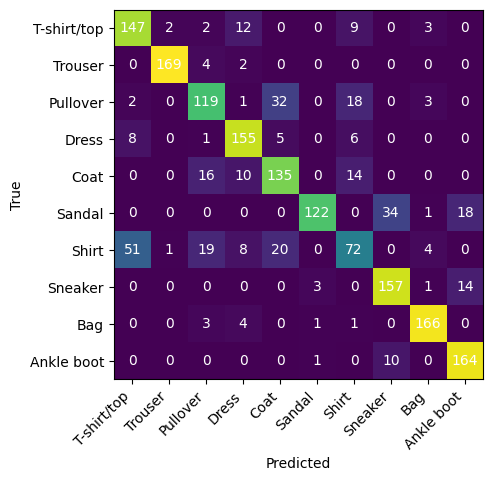

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(fmnist_classes.values()), rotation=45, ha="right")
ax.set_yticklabels(list(fmnist_classes.values()))
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

## Interpreting model parameters
Finally, we'll take a closer look at the model parameters, i.e. the coefficients of our linear models. Since we are dealing with 28x28 pixel images, we have to learn 784 coefficients. What do these coefficients mean? We'll start by plotting them as 28x28 pixel images.

### Question 4
Train a Logistic Regression model using its tuned hyperparameter from gridsearch used above.
When in doubt, use `C=1e-7` for LogReg.
Pass the trained model to the provided plotting function. Interpret the results in detail.
Why do you get multiple plots per model? What do the features represent in your data.
Does it seems like the models pay attention to the right features?
Do you models seem to ignore certain features? Do you observe differences in quality between the different classes?

In [ ]:
# Plots the coefficients of the given model as 28x28 heatmaps.
# The `name` attribute is optional, it is simply a title for the produced figure
def plot_coefficients(model, name=None):
    fig, axes = plt.subplots(1,10,figsize=(20,2))
    fig.suptitle(name if name else model.__class__.__name__)
    for i, ax in enumerate(axes):
        m = ax.imshow(model.coef_[i].reshape(28,28))
        ax.set_xlabel(fmnist_classes[i])
        ax.set_xticks(()), ax.set_yticks(())
    fig.colorbar(m, ax=axes.ravel().tolist())

In [ ]:
##### Call on the function plot_coefficients using your trained model
logreg_model = LogisticRegression(C=1e-7).fit(X_train,y_train)
plot_coefficients(logreg_model)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Hint** that linear models are typically binary classifiers. They will solve multi-class problems in a one-vs-all approach. Hence, for a 10-class problem, they will build 10 models, each one trained to predict whether an instance is from a specific class or not. This leads to 10 sets of 784 trained coefficients. Above, we plot them as 28x28 matrices, such that each coefficient is plotted at the location of their corresponding pixel value.

**Answer:**
Why do you get multiple plots per model?
As it's a 10-class problem
<br>
What do the features represent in your data.
The pixels of the target class
<br>
Does it seems like the models pay attention to the right features?
Do your models seem to ignore certain features?
Yes, As the pixels of the target class part are bighter and the pixels of the non target class part of the image are darker
<br>
 Do you observe differences in quality between the different classes?
 yes, as it - for example - predicts the trousers much better than the sandal and the sneaker, and the t-shirt is somehow affecting the other classes predictions

### Question 5
Finally, out of curiosity, let's see the result of underfitting and overfitting on the learned coefficients:
Repeat the previous exercise, only with logistic regression. In addition to a tuned version, also add a model that overfits a lot and one that underfits a lot.

In the cell below replace the ####### with your trained models with different alphas.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

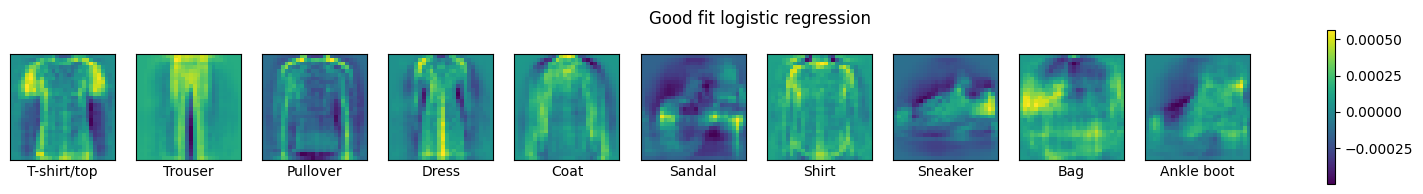

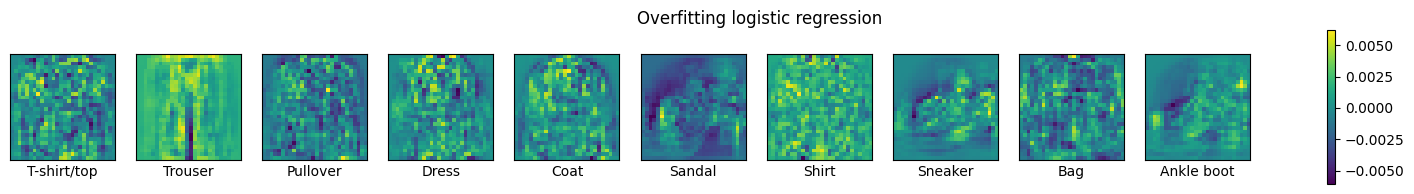

In [ ]:
plot_coefficients(LogisticRegression(C=1e-10).fit(X_train,y_train),"Underfitting logistic regression")
plot_coefficients(LogisticRegression(C=1e-7).fit(X_train,y_train),"Good fit logistic regression")
plot_coefficients(LogisticRegression(C=1e10).fit(X_train,y_train),"Overfitting logistic regression")

Interpret and explain the results.
* **Answer:**

# Part 2

In this part, you will use a bank dataset that predicts customer response to telemarketing campaigns for term deposit.

You should follow the workflow we described in class to use logistic regression to train on the data

1. Train - Test split (80-20%)
    - Study and handle any imbalance in the data's target
2. Data Exploration and cleaning
    - Remove duplicates
    - Handle outliers
    - Handle missing values
    - Handle categorical data
    
    (dont forget to apply the same preprocessing to the test set!)
3. Model selection --> Select the best model:
    - Train an l2 regularized logistic regression model
        - Use crossvalidation with grid search to set the learning rate and the regularization hyperparameters
    - Train a logistic regression model without regullarization
        - Use crossvalidation with grid search to set the learning rate  hyperparameter
    - Don't forget normalization of features!
4. Test the chosen model on the test data
5. Interpret the results using confusion matrix --> how does it do on each class?

### Attribute information For bank dataset

### Input variables:
**Bank client data:**
*   1 - age : (numeric)
*   2 - job : type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")
*   3 - marital : marital status (categorical: "married", "divorced", "single"; note: "divorced" means divorced or widowed)
*   4 - education (categorical: "unknown", "secondary","primary", "tertiary")
*   5 - default: has credit in default? (binary: "yes", "no")
*   6 - balance: average yearly balance, in euros (numeric)
*   7 - housing: has housing loan? (binary: "yes", "no")
*   8 - loan: has personal loan? (binary: "yes", "no")
  
**Related with the last contact of the current campaign:**
*   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
*  10 - day: last contact day of the month (numeric)
*  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
*  12 - duration: last contact duration, in seconds (numeric)
   
**Other attributes:**
*  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
*  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
*  15 - previous: number of contacts performed before this campaign and for this client (numeric)
*  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success")

- The Output variable - y - describes whether the client has subscribed to a term deposit or not, ("yes" or "no")

Importing the libraries

In [2]:
# pandas
import pandas as pd
from pandas.plotting import scatter_matrix
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
# seaborn
import seaborn as sns
# matplotlib
import matplotlib.pyplot as plt 
# scipy
from scipy import stats
# numpy
import numpy as np

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')
bank_df = pd.read_csv('bank-full.csv' , sep=';')

In [5]:
X = bank_df.drop('y', axis=1)
y = bank_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

Exploratory Data Analysis

In [9]:
X_train.shape

(36168, 16)

In [10]:
X_train.describe()

age       balance           day      duration      campaign  \
count  36168.000000   36168.00000  36168.000000  36168.000000  36168.000000   
mean      40.892999    1365.49342     15.817961    258.506940      2.763935   
std       10.627075    3068.54350      8.331980    259.142445      3.104161   
min       18.000000   -8019.00000      1.000000      0.000000      1.000000   
25%       33.000000      74.00000      8.000000    103.000000      1.000000   
50%       39.000000     451.00000     16.000000    180.000000      2.000000   
75%       48.000000    1430.25000     21.000000    318.000000      3.000000   
max       95.000000  102127.00000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  36168.000000  36168.000000  
mean      40.157238      0.581730  
std      100.162614      2.408766  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [11]:
X_train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [12]:
X_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [13]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [14]:
X_train.count()

age          36168
job          36168
marital      36168
education    36168
default      36168
balance      36168
housing      36168
loan         36168
contact      36168
day          36168
month        36168
duration     36168
campaign     36168
pdays        36168
previous     36168
poutcome     36168
dtype: int64

Handling Categorical Data

In [15]:
categorical_features_list = []
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        print("An overview of the categorical feature:",col)
        categorical_features_list.append(col)
        print(X_train[col].unique(), "and the number of unique values of this feature is:",len(X_train[col].unique()))
        print()
print("-----------------------------------------")
print("The Categorical Data")
print(categorical_features_list)

An overview of the categorical feature: job
['technician' 'student' 'unemployed' 'blue-collar' 'management' 'services'
 'admin.' 'retired' 'unknown' 'entrepreneur' 'housemaid' 'self-employed'] and the number of unique values of this feature is: 12

An overview of the categorical feature: marital
['divorced' 'single' 'married'] and the number of unique values of this feature is: 3

An overview of the categorical feature: education
['secondary' 'tertiary' 'primary' 'unknown'] and the number of unique values of this feature is: 4

An overview of the categorical feature: default
['no' 'yes'] and the number of unique values of this feature is: 2

An overview of the categorical feature: housing
['no' 'yes'] and the number of unique values of this feature is: 2

An overview of the categorical feature: loan
['no' 'yes'] and the number of unique values of this feature is: 2

An overview of the categorical feature: contact
['telephone' 'cellular' 'unknown'] and the number of unique values of thi

One hot encoding using will create multiple columns of the feature, this makes it harder to study the correlation, so I'll use numerical encoding just for the correlation matrix as, LabelEncoder() isn't designed for features but for target variables

In [13]:
le = LabelEncoder()
X_train_encoded = X_train.copy()
categorical_features_dict = {}
for col in X_train_encoded.columns:
    if X_train_encoded[col].dtype == 'object':
        # Store the old unique values
        old_feature_value = X_train_encoded[col].unique()
        # Apply label encoding
        X_train_encoded[col] = le.fit_transform(X_train_encoded[col])
        # Get the new unique values (encoded values)
        new_feature_value = X_train_encoded[col].unique()
        # Print the old and new values
        categorical_features_dict[col] = list(zip(old_feature_value, new_feature_value))
        print("The feature", col, "has encoded values", list(zip(old_feature_value, new_feature_value)), "of length", len(new_feature_value))


The feature job has encoded values [('technician', 9), ('student', 8), ('unemployed', 10), ('blue-collar', 1), ('management', 4), ('services', 7), ('admin.', 0), ('retired', 5), ('unknown', 11), ('entrepreneur', 2), ('housemaid', 3), ('self-employed', 6)] of length 12
The feature marital has encoded values [('divorced', 0), ('single', 2), ('married', 1)] of length 3
The feature education has encoded values [('secondary', 1), ('tertiary', 2), ('primary', 0), ('unknown', 3)] of length 4
The feature default has encoded values [('no', 0), ('yes', 1)] of length 2
The feature housing has encoded values [('no', 0), ('yes', 1)] of length 2
The feature loan has encoded values [('no', 0), ('yes', 1)] of length 2
The feature contact has encoded values [('telephone', 1), ('cellular', 0), ('unknown', 2)] of length 3
The feature month has encoded values [('aug', 1), ('apr', 0), ('jul', 5), ('feb', 3), ('jun', 6), ('may', 8), ('nov', 9), ('mar', 7), ('oct', 10), ('jan', 4), ('sep', 11), ('dec', 2)] o

In [17]:
categorical_features_dict

{'job': [('technician', 9),
  ('student', 8),
  ('unemployed', 10),
  ('blue-collar', 1),
  ('management', 4),
  ('services', 7),
  ('admin.', 0),
  ('retired', 5),
  ('unknown', 11),
  ('entrepreneur', 2),
  ('housemaid', 3),
  ('self-employed', 6)],
 'marital': [('divorced', 0), ('single', 2), ('married', 1)],
 'education': [('secondary', 1),
  ('tertiary', 2),
  ('primary', 0),
  ('unknown', 3)],
 'default': [('no', 0), ('yes', 1)],
 'housing': [('no', 0), ('yes', 1)],
 'loan': [('no', 0), ('yes', 1)],
 'contact': [('telephone', 1), ('cellular', 0), ('unknown', 2)],
 'month': [('aug', 1),
  ('apr', 0),
  ('jul', 5),
  ('feb', 3),
  ('jun', 6),
  ('may', 8),
  ('nov', 9),
  ('mar', 7),
  ('oct', 10),
  ('jan', 4),
  ('sep', 11),
  ('dec', 2)],
 'poutcome': [('unknown', 3), ('failure', 0), ('other', 1), ('success', 2)]}

In [18]:
len(X_train_encoded.columns)

16

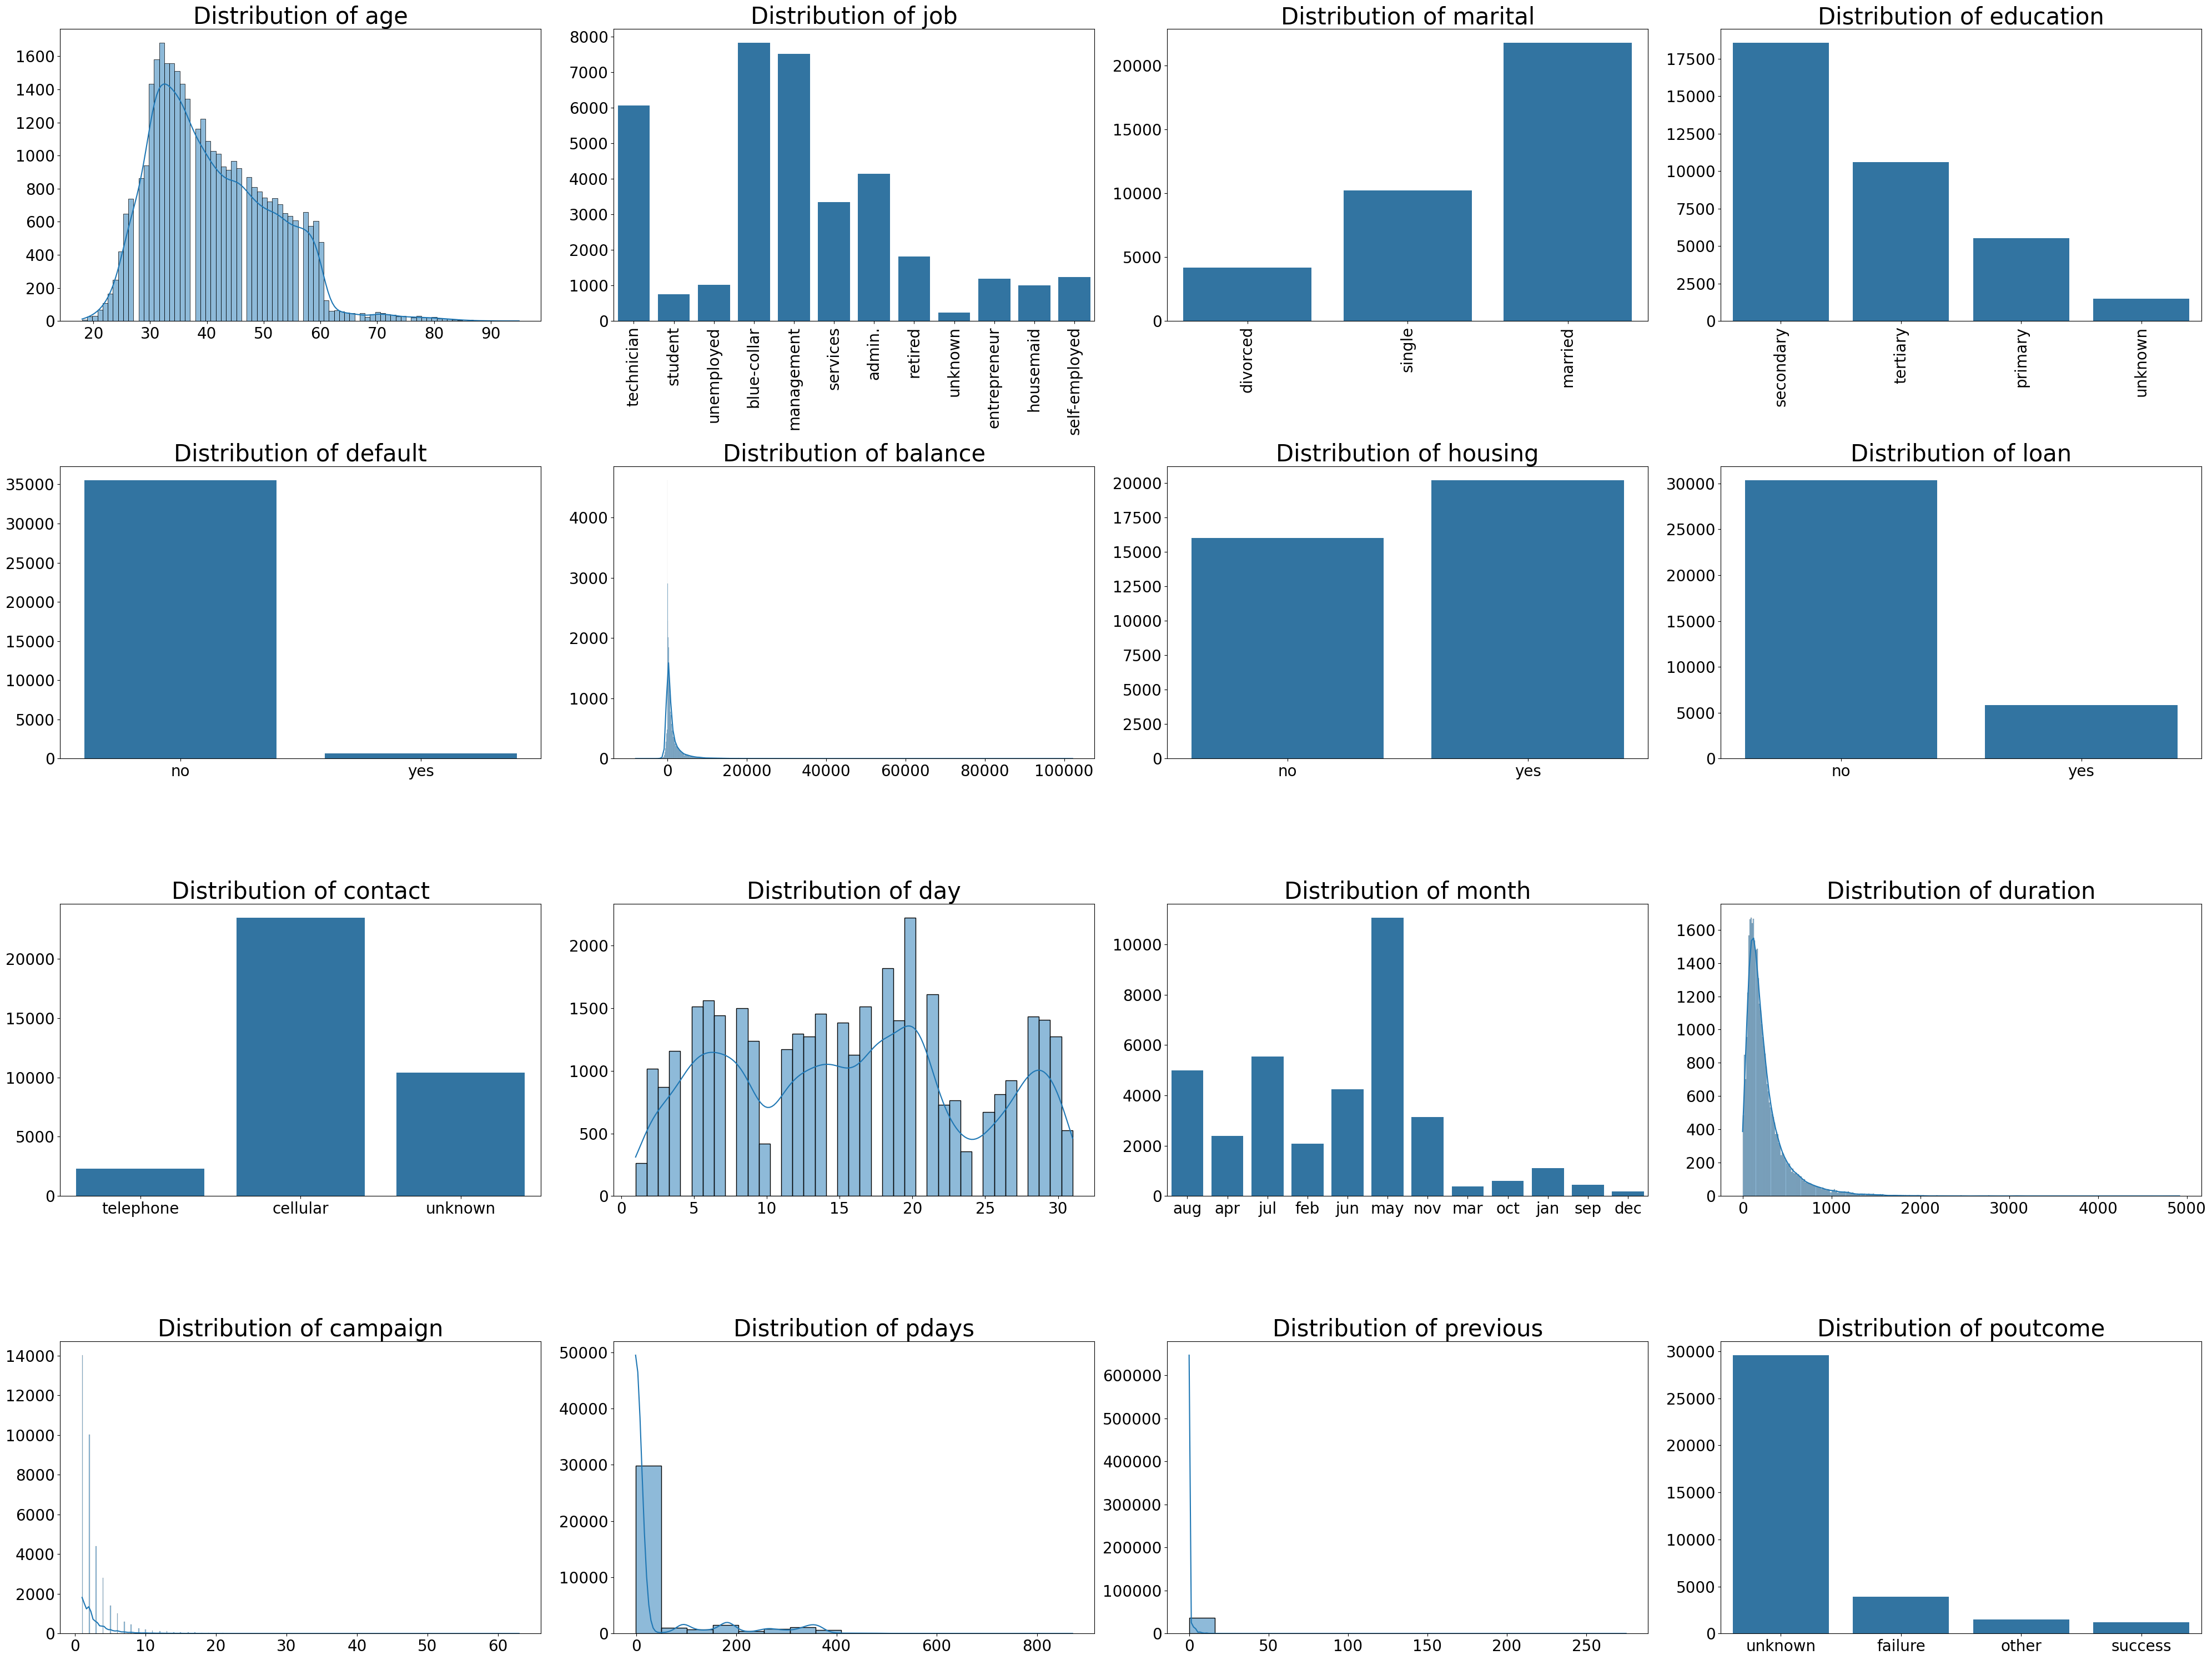

In [19]:
# Plotting the distribution of the features
def plot_dist(nrows, ncols, data, original_data, categorical_features_list):
    fig, ax = plt.subplots(nrows, ncols, figsize=(40, 30))
    for i, feature in enumerate(data.columns):
        row = i // nrows
        col = i % ncols
        if feature in categorical_features_list:
            sns.countplot(x=original_data[feature], ax=ax[row, col])
            # Rotate the labels for the first row only as job labels are overlapping
            if row == 0:
                for label in ax[row, col].get_xticklabels():
                    label.set_rotation(90)
                    label.set_fontsize(20)
        else: 
            sns.histplot(data[feature], kde=True, ax=ax[row, col])
        ax[row, col].set_title(f"Distribution of {feature}", fontsize="30")
        ax[row, col].tick_params(axis='both', which='major', labelsize=20)
        # Remove the small labels on the axes
        ax[row, col].set_xlabel('')
        ax[row, col].set_ylabel('')
    plt.tight_layout()
    plt.show()

# Adjust the number of rows and columns as needed
plot_dist(4, 4, X_train_encoded, X_train, categorical_features_list)


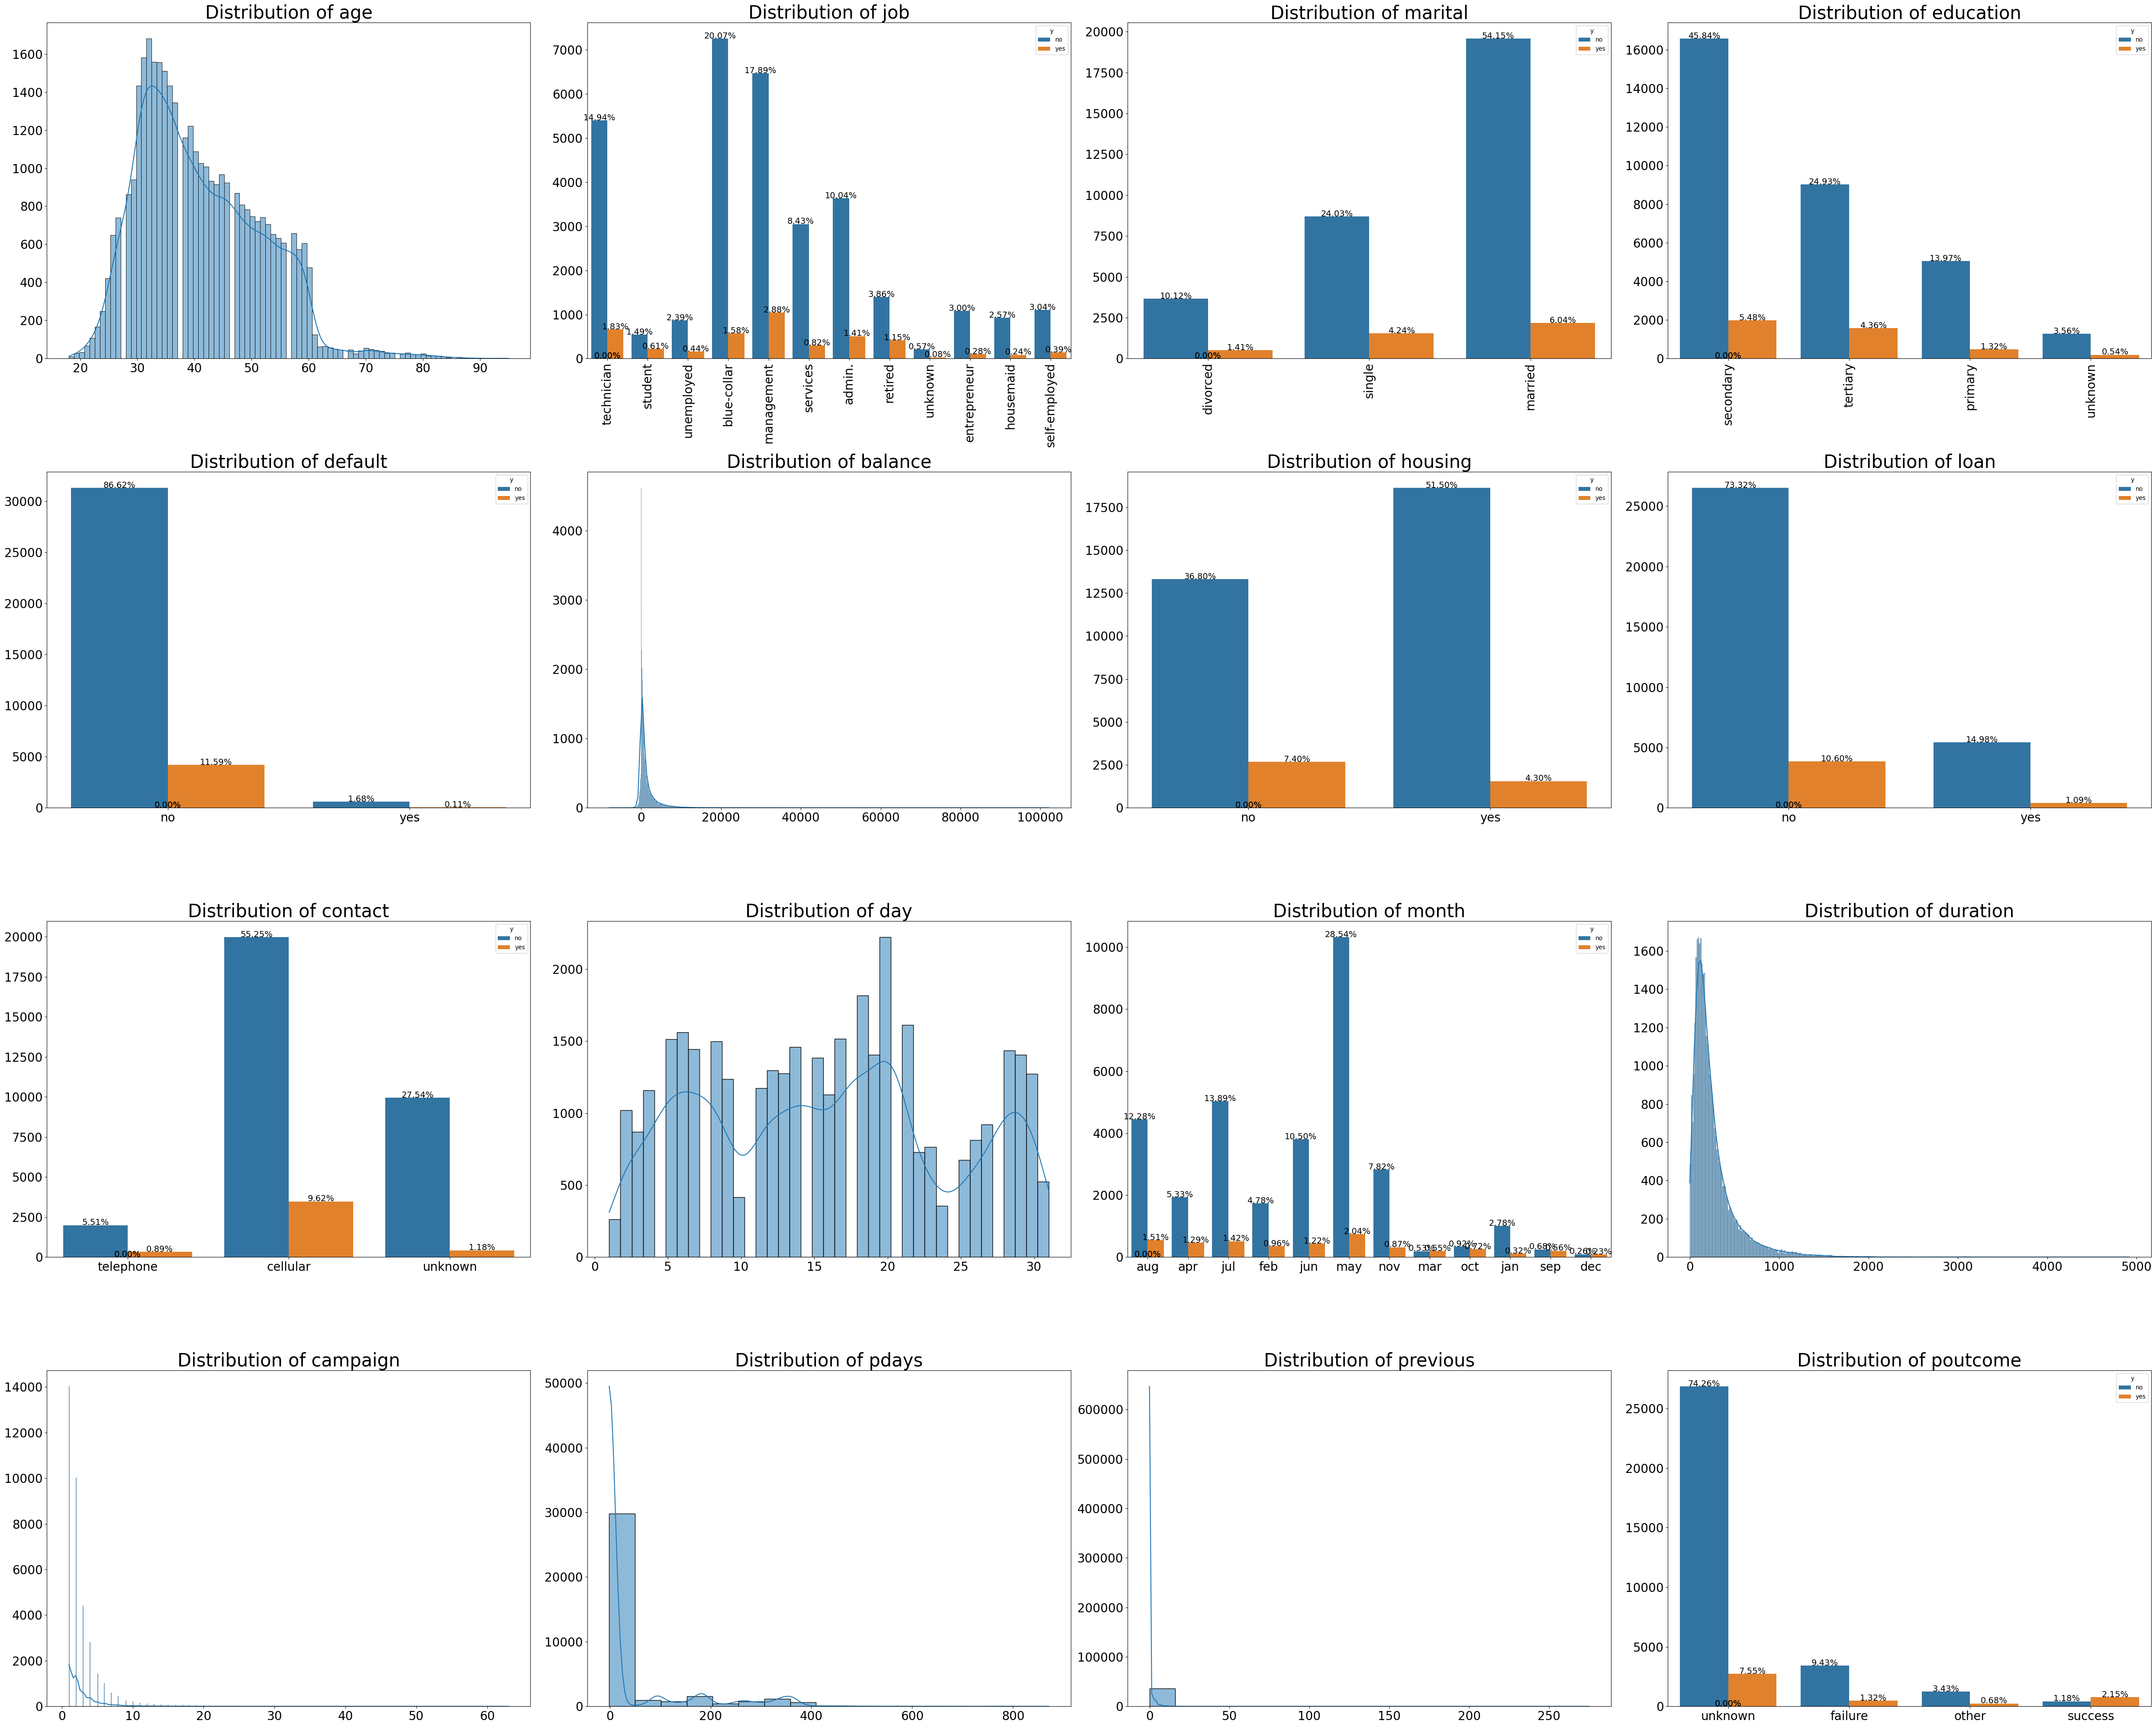

In [20]:

def plot_dist_with_y(nrows, ncols, data, original_data, categorical_features_list, y):
    fig, ax = plt.subplots(nrows, ncols, figsize=(50, 40))
    for i, feature in enumerate(data.columns):
        row = i // nrows
        col = i % ncols
        if feature in categorical_features_list:
            axi = sns.countplot(x=original_data[feature], hue=y, ax=ax[row, col])
            total = len(original_data[feature])
            for p in axi.patches:
                height = p.get_height()
                axi.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", 
                fontsize=14) 

            # Rotate the labels for the first row only as job labels are overlapping
            if row == 0:
                for label in ax[row, col].get_xticklabels():
                    label.set_rotation(90)
                    label.set_fontsize(20)
        else: 
            # Non categorical data
            sns.histplot(data[feature], kde=True, ax=ax[row, col])

        ax[row, col].set_title(f"Distribution of {feature}", fontsize="30")
        ax[row, col].tick_params(axis='both', which='major', labelsize=20)
        # Remove the small labels on the axes
        ax[row, col].set_xlabel('')
        ax[row, col].set_ylabel('')
    plt.tight_layout()
    plt.show()

plot_dist_with_y(4, 4, X_train_encoded, X_train, categorical_features_list, y_train)


Inspecting the Correlation among he features, if some features are co-dependent, they can be considered as redundant

age       job   marital  education   default   balance  \
age        1.000000 -0.022373 -0.402432  -0.103629 -0.018859  0.096164   
job       -0.022373  1.000000  0.060790   0.170692 -0.007627  0.017406   
marital   -0.402432  0.060790  1.000000   0.106657 -0.005265  0.005079   
education -0.103629  0.170692  0.106657   1.000000 -0.007410  0.062469   
default   -0.018859 -0.007627 -0.005265  -0.007410  1.000000 -0.066333   
balance    0.096164  0.017406  0.005079   0.062469 -0.066333  1.000000   
housing   -0.189143 -0.126776 -0.016095  -0.090511 -0.004213 -0.067494   
loan      -0.018716 -0.029272 -0.046718  -0.045563  0.080089 -0.085082   
contact    0.025163 -0.077875 -0.036000  -0.111961  0.012546 -0.027352   
day       -0.009765  0.023401 -0.005856   0.028276  0.007856  0.002354   
month     -0.044568 -0.092585 -0.005995  -0.056402  0.014008  0.018205   
duration  -0.004284  0.003124  0.011483  -0.001033 -0.011941  0.021114   
campaign   0.007818  0.009059 -0.012068   0.005947  0.013624 -0.014405   
pdays     -0.024410 -0.028485  0.015038   0.000755 -0.027646  0.003141   
previous   0.001832 -0.004902  0.011671   0.017194 -0.018998  0.017328   
poutcome   0.007064  0.016284 -0.013957  -0.019318  0.033065 -0.020935   

            housing      loan   contact       day     month  duration  \
age       -0.189143 -0.018716  0.025163 -0.009765 -0.044568 -0.004284   
job       -0.126776 -0.029272 -0.077875  0.023401 -0.092585  0.003124   
marital   -0.016095 -0.046718 -0.036000 -0.005856 -0.005995  0.011483   
education -0.090511 -0.045563 -0.111961  0.028276 -0.056402 -0.001033   
default   -0.004213  0.080089  0.012546  0.007856  0.014008 -0.011941   
balance   -0.067494 -0.085082 -0.027352  0.002354  0.018205  0.021114   
housing    1.000000  0.043248  0.187386 -0.031700  0.270466  0.004452   
loan       0.043248  1.000000 -0.012242  0.011784  0.023068 -0.008520   
contact    0.187386 -0.012242  1.000000 -0.030351  0.361711 -0.018893   
day       -0.031700  0.011784 -0.030351  1.000000 -0.008705 -0.031352   
month      0.270466  0.023068  0.361711 -0.008705  1.000000  0.003764   
duration   0.004452 -0.008520 -0.018893 -0.031352  0.003764  1.000000   
campaign  -0.022074  0.008179  0.022935  0.161620 -0.109145 -0.086704   
pdays      0.123723 -0.025025 -0.244305 -0.093492  0.033212 -0.006306   
previous   0.036138 -0.012645 -0.141335 -0.049443  0.023576 -0.000790   
poutcome  -0.099204  0.018401  0.271932  0.084382 -0.032628  0.013647   

           campaign     pdays  previous  poutcome  
age        0.007818 -0.024410  0.001832  0.007064  
job        0.009059 -0.028485 -0.004902  0.016284  
marital   -0.012068  0.015038  0.011671 -0.013957  
education  0.005947  0.000755  0.017194 -0.019318  
default    0.013624 -0.027646 -0.018998  0.033065  
balance   -0.014405  0.003141  0.017328 -0.020935  
housing   -0.022074  0.123723  0.036138 -0.099204  
loan       0.008179 -0.025025 -0.012645  0.018401  
contact    0.022935 -0.244305 -0.141335  0.271932  
day        0.161620 -0.093492 -0.049443  0.084382  
month     -0.109145  0.033212  0.023576 -0.032628  
duration  -0.086704 -0.006306 -0.000790  0.013647  
campaign   1.000000 -0.088898 -0.031240  0.101250  
pdays     -0.088898  1.000000  0.438963 -0.859393  
previous  -0.031240  0.438963  1.000000 -0.470115  
poutcome   0.101250 -0.859393 -0.470115  1.000000

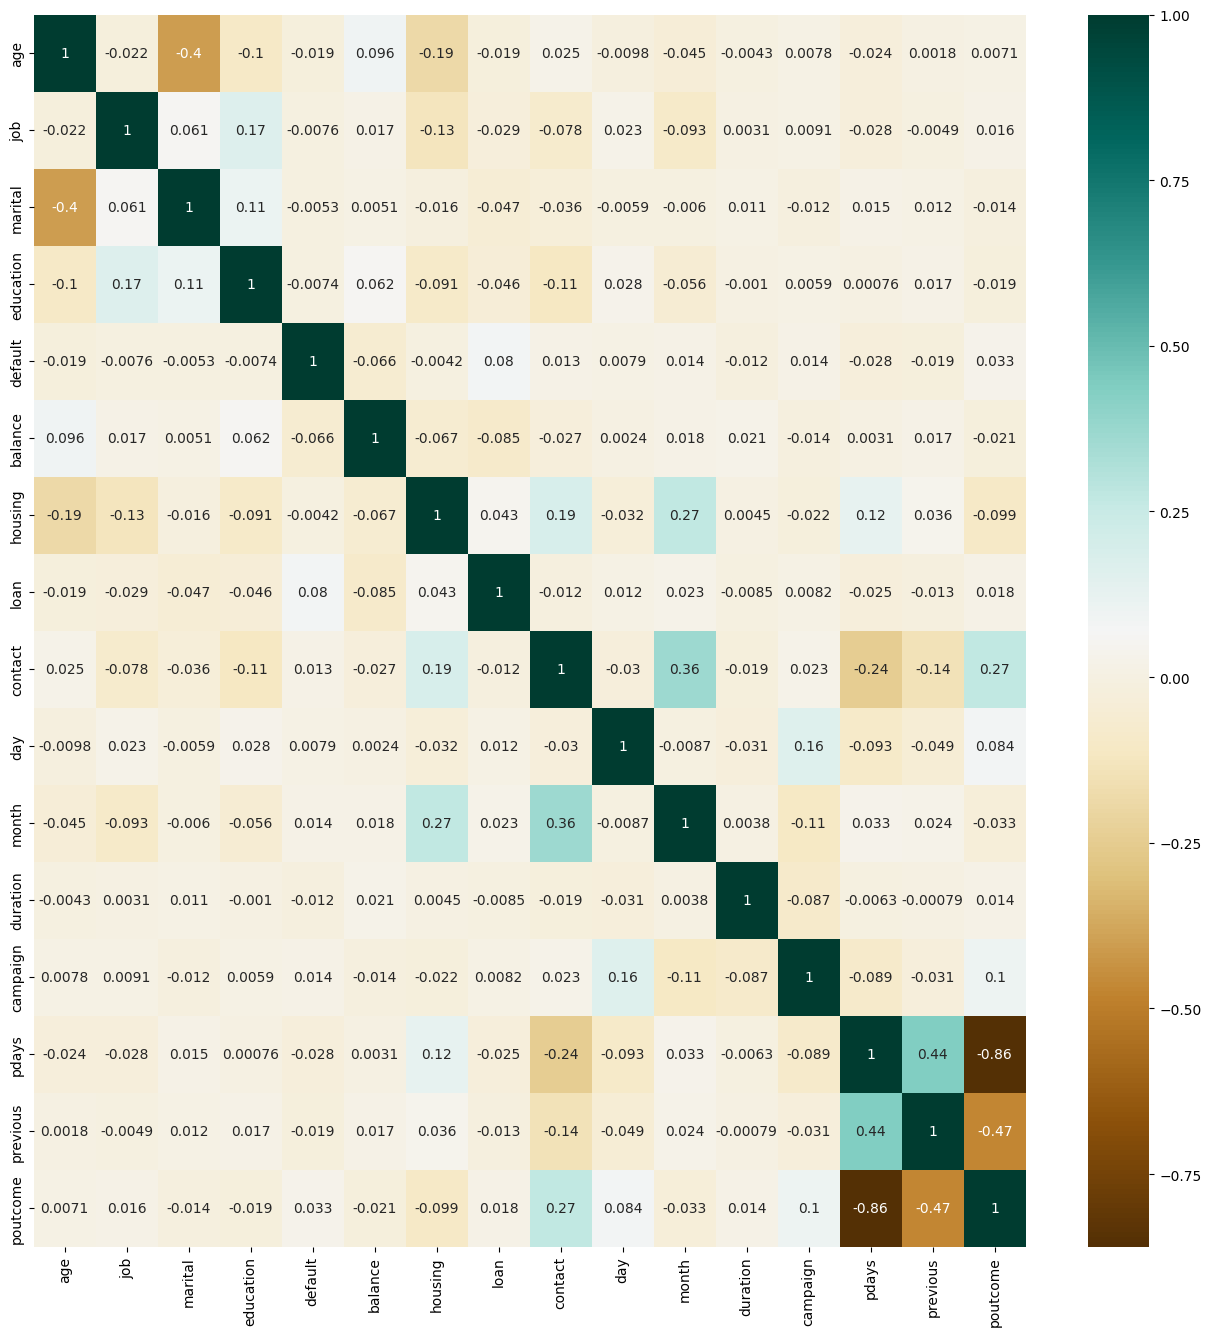

In [21]:
# Plotting the correlation matrix
plt.figure(figsize=(16,16))
c =  X_train_encoded.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

There's a strong correlation between the features "pdays" and "poutcome"

In [22]:
# Get a boolean mask for numeric columns
numeric_cols_mask = (X_train.dtypes != object)

# Create a new DataFrame with numeric columns only
X_train_numeric = X_train.loc[:, numeric_cols_mask]



In [23]:
# Plotting the scatter plot
scatter_matrix(X_train_numeric, figsize=(40,30))
plt.show()


From the Correlation Matrix, there's a strong correlation between the feature "previous" and "poutcome" 

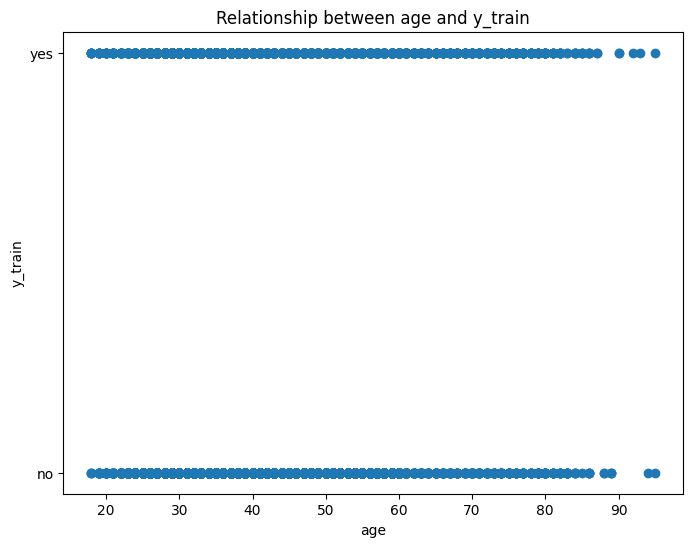

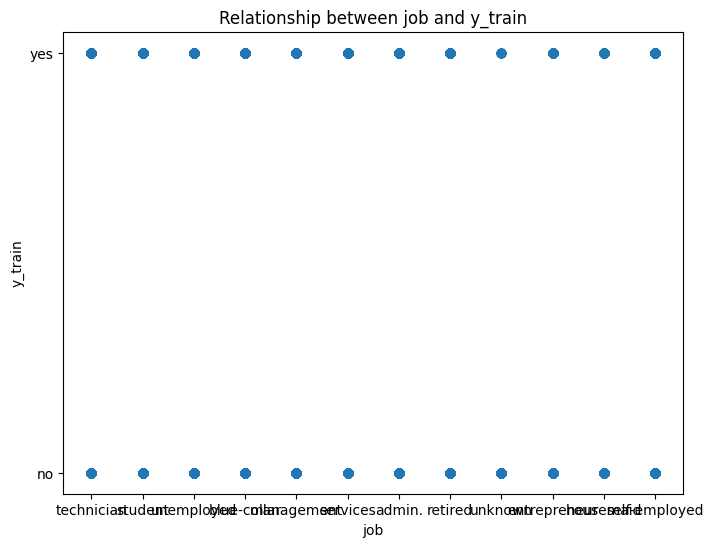

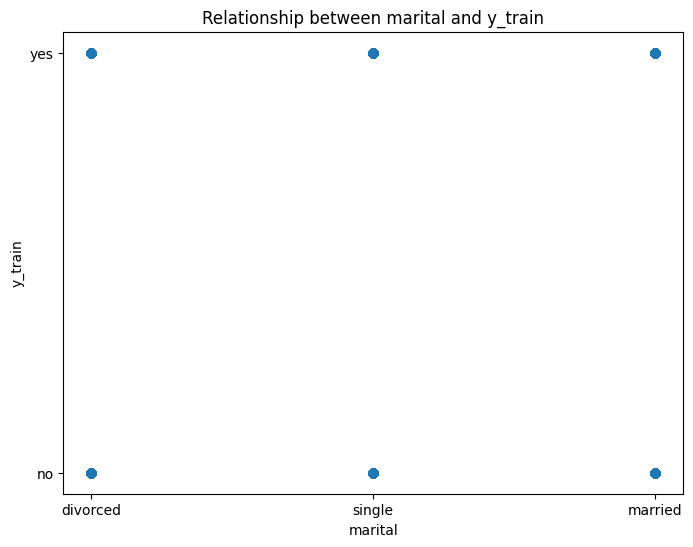

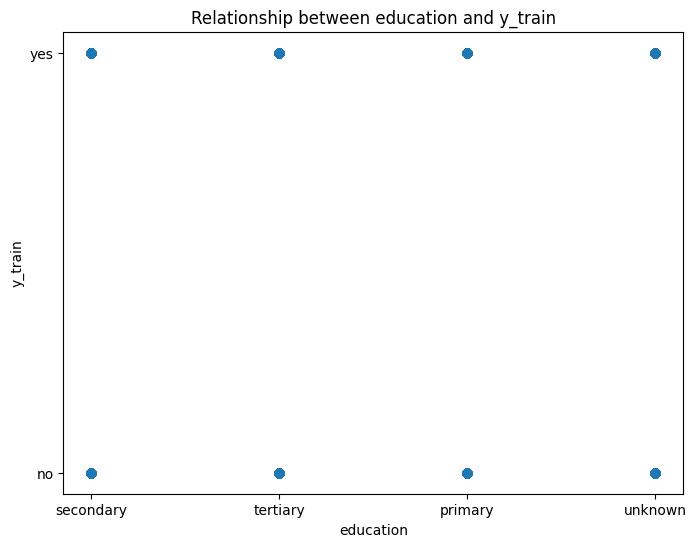

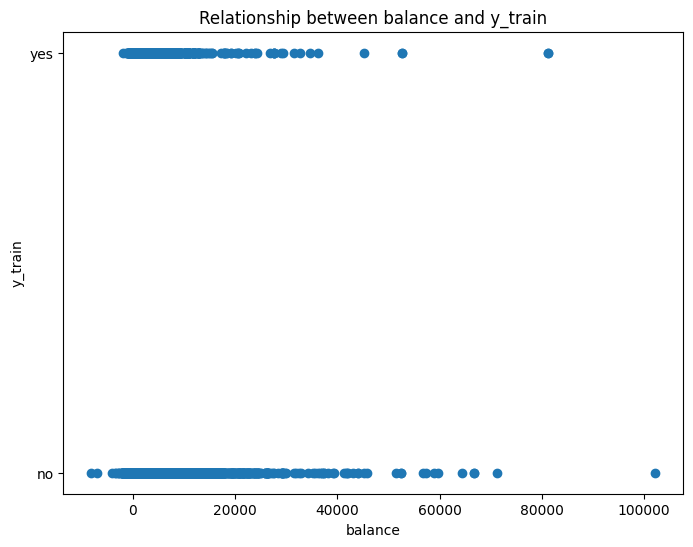

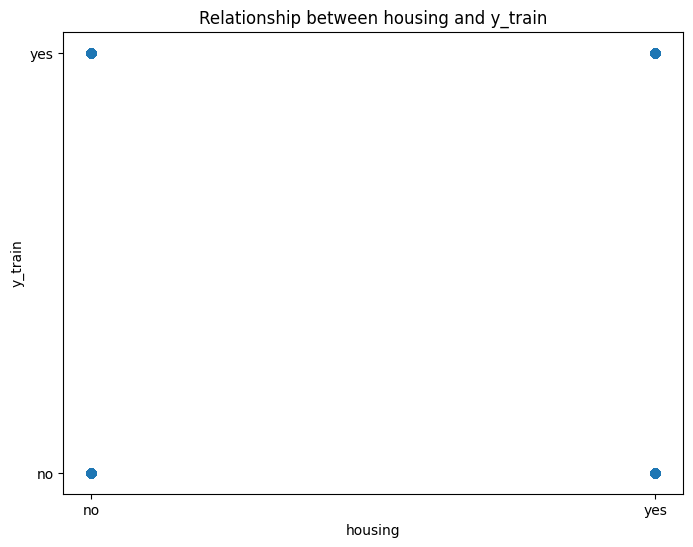

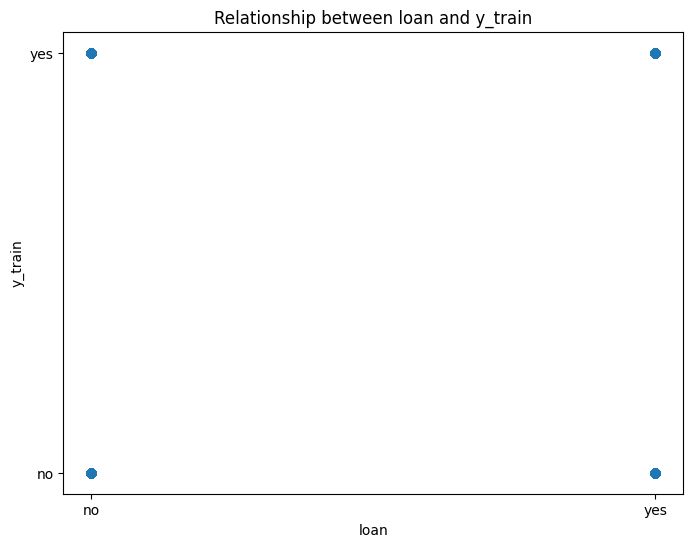

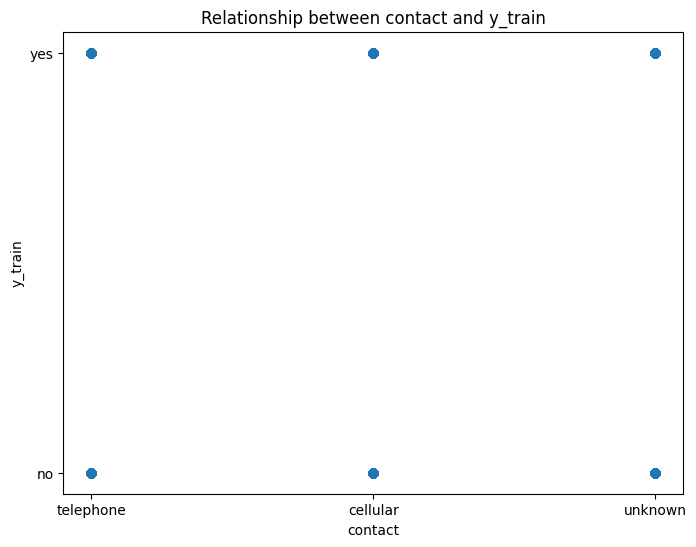

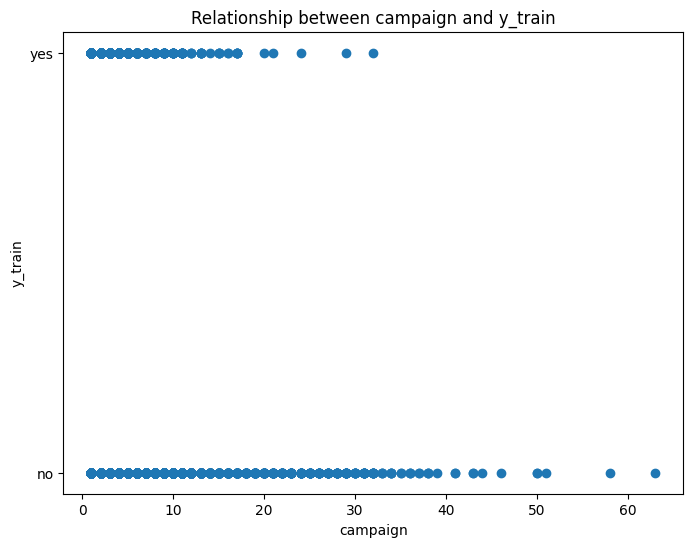

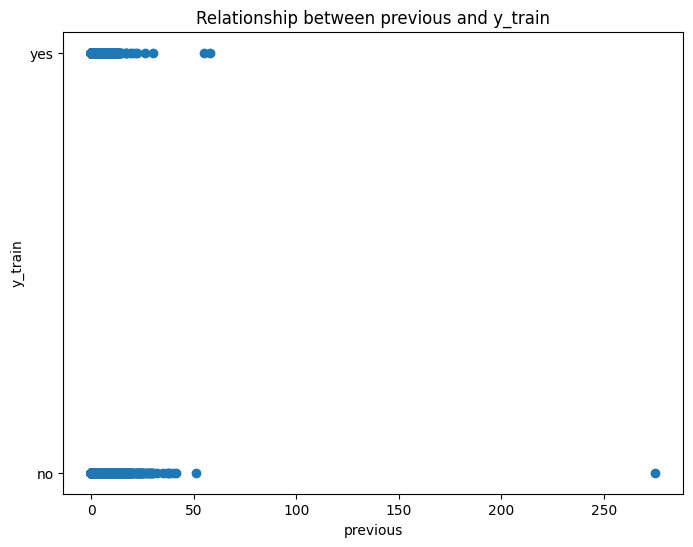

In [24]:
# Plotting the relation between each feature and y_train
for col in X_train.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train[col], y_train)
    plt.xlabel(col)
    plt.ylabel('y_train')
    plt.title(f'Relationship between {col} and y_train')
    plt.show()


As we'll use the logistic regression model, I plotted the relation between each numeric feature and its sigmoid probablity

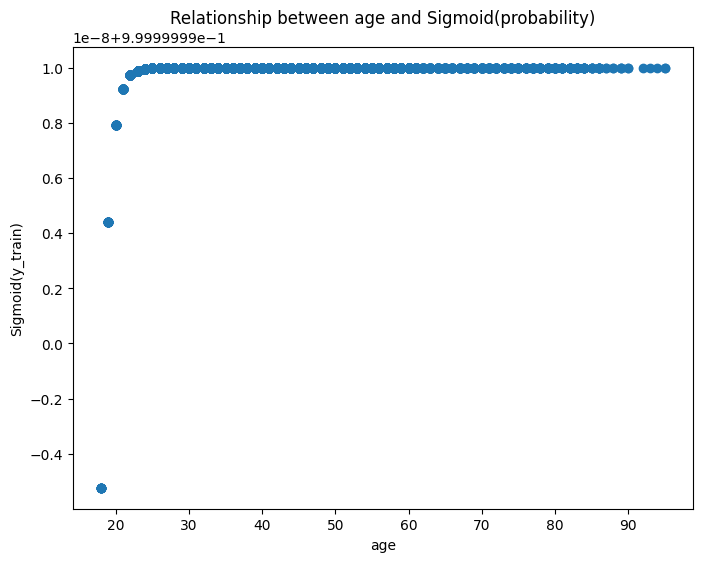

c:\Users\nouran\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


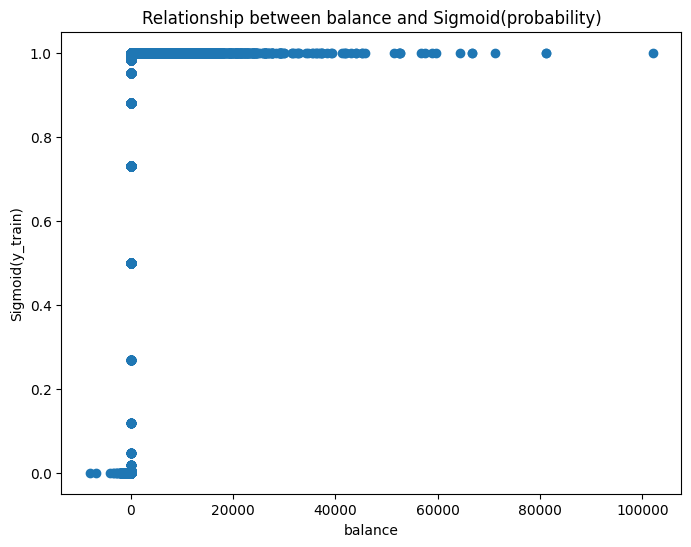

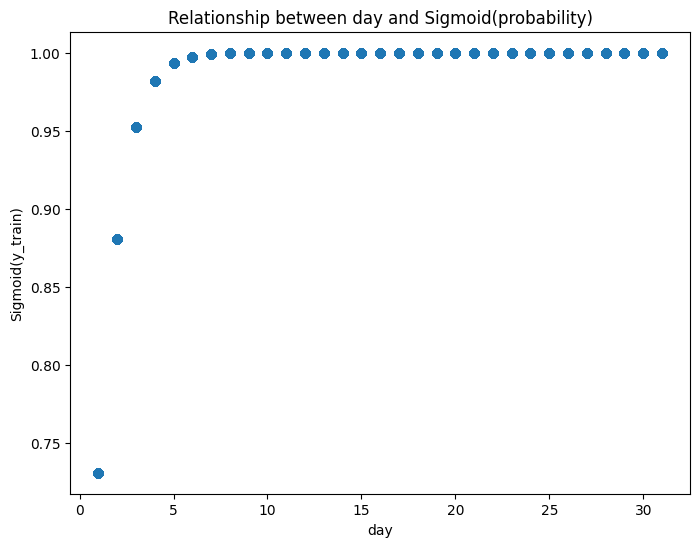

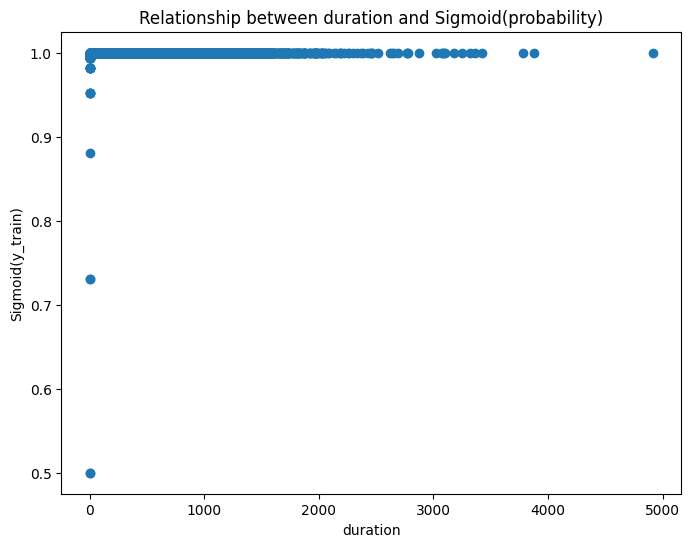

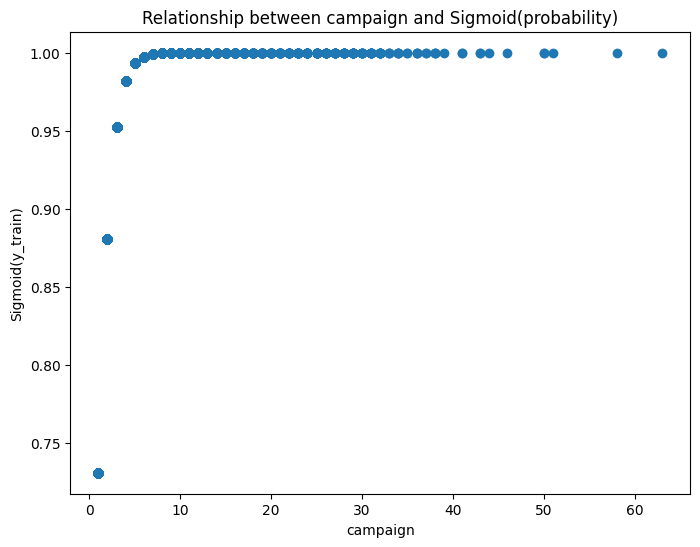

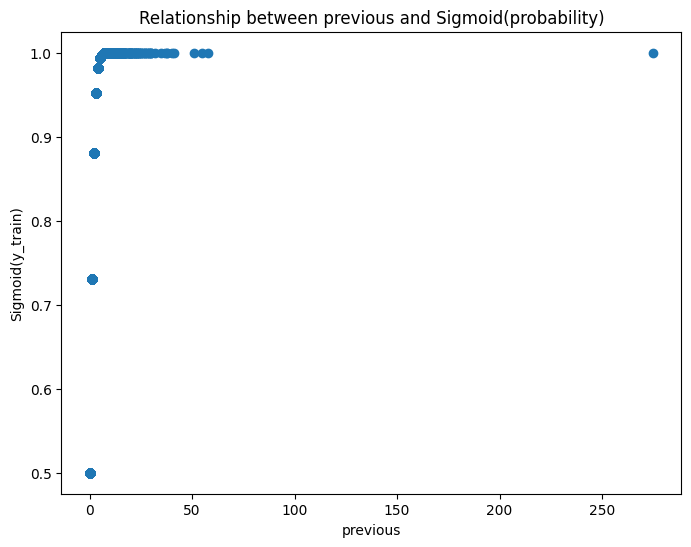

In [25]:
# Defining the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

for col in X_train_numeric.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_numeric[col], sigmoid(X_train_numeric[col]))
    plt.xlabel(col)
    plt.ylabel('Sigmoid(y_train)')
    plt.title(f'Relationship between {col} and Sigmoid(probability)')
    plt.show()


outliers detection, using interquartile range (IQR) method as the features are not normally distributed (can't use the z-score), the dataset is small and IQR method is less sensitive to extreme values

In [9]:
# Select only numeric columns
numeric_cols = X_train.select_dtypes(include=[np.number])

# Calculate IQR for each numeric column
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Define a mask for values within the IQR
mask = (numeric_cols >= (Q1 - 1.5 * IQR)) & (numeric_cols <= (Q3 + 1.5 * IQR))

# Apply the mask to get a DataFrame with outliers removed
X_train_iqr_numeric = numeric_cols[mask]

# Replace NaN values with the median of each column
X_train_iqr_numeric = X_train_iqr_numeric.fillna(0)

# Select only non-numeric columns from X_train
non_numeric_cols = X_train.select_dtypes(exclude=[np.number])

# Concatenate non-numeric columns and numeric columns (with outliers removed)
X_train_iqr = pd.concat([X_train_iqr_numeric, non_numeric_cols], axis=1)

# Reindex the columns of X_train_iqr to match the order in X_train
X_train_iqr = X_train_iqr.reindex(columns=X_train.columns)


In [27]:
X_train_iqr.head()

age         job   marital  education default  balance housing loan  \
24001  36.0  technician  divorced  secondary      no    861.0      no   no   
43409  24.0     student    single  secondary      no      0.0      no   no   
20669  44.0  technician    single  secondary      no    244.0     yes   no   
18810  48.0  unemployed   married  secondary      no      0.0      no   no   
23130  38.0  technician   married  secondary      no    257.0      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  
24001  telephone   29   aug     140.0       2.0   -1.0       0.0  unknown  
43409   cellular    5   apr       0.0       4.0    0.0       0.0  failure  
20669   cellular   12   aug       0.0       4.0   -1.0       0.0  unknown  
18810  telephone   31   jul      35.0       0.0   -1.0       0.0  unknown  
23130   cellular   26   aug      57.0       0.0   -1.0       0.0  unknown

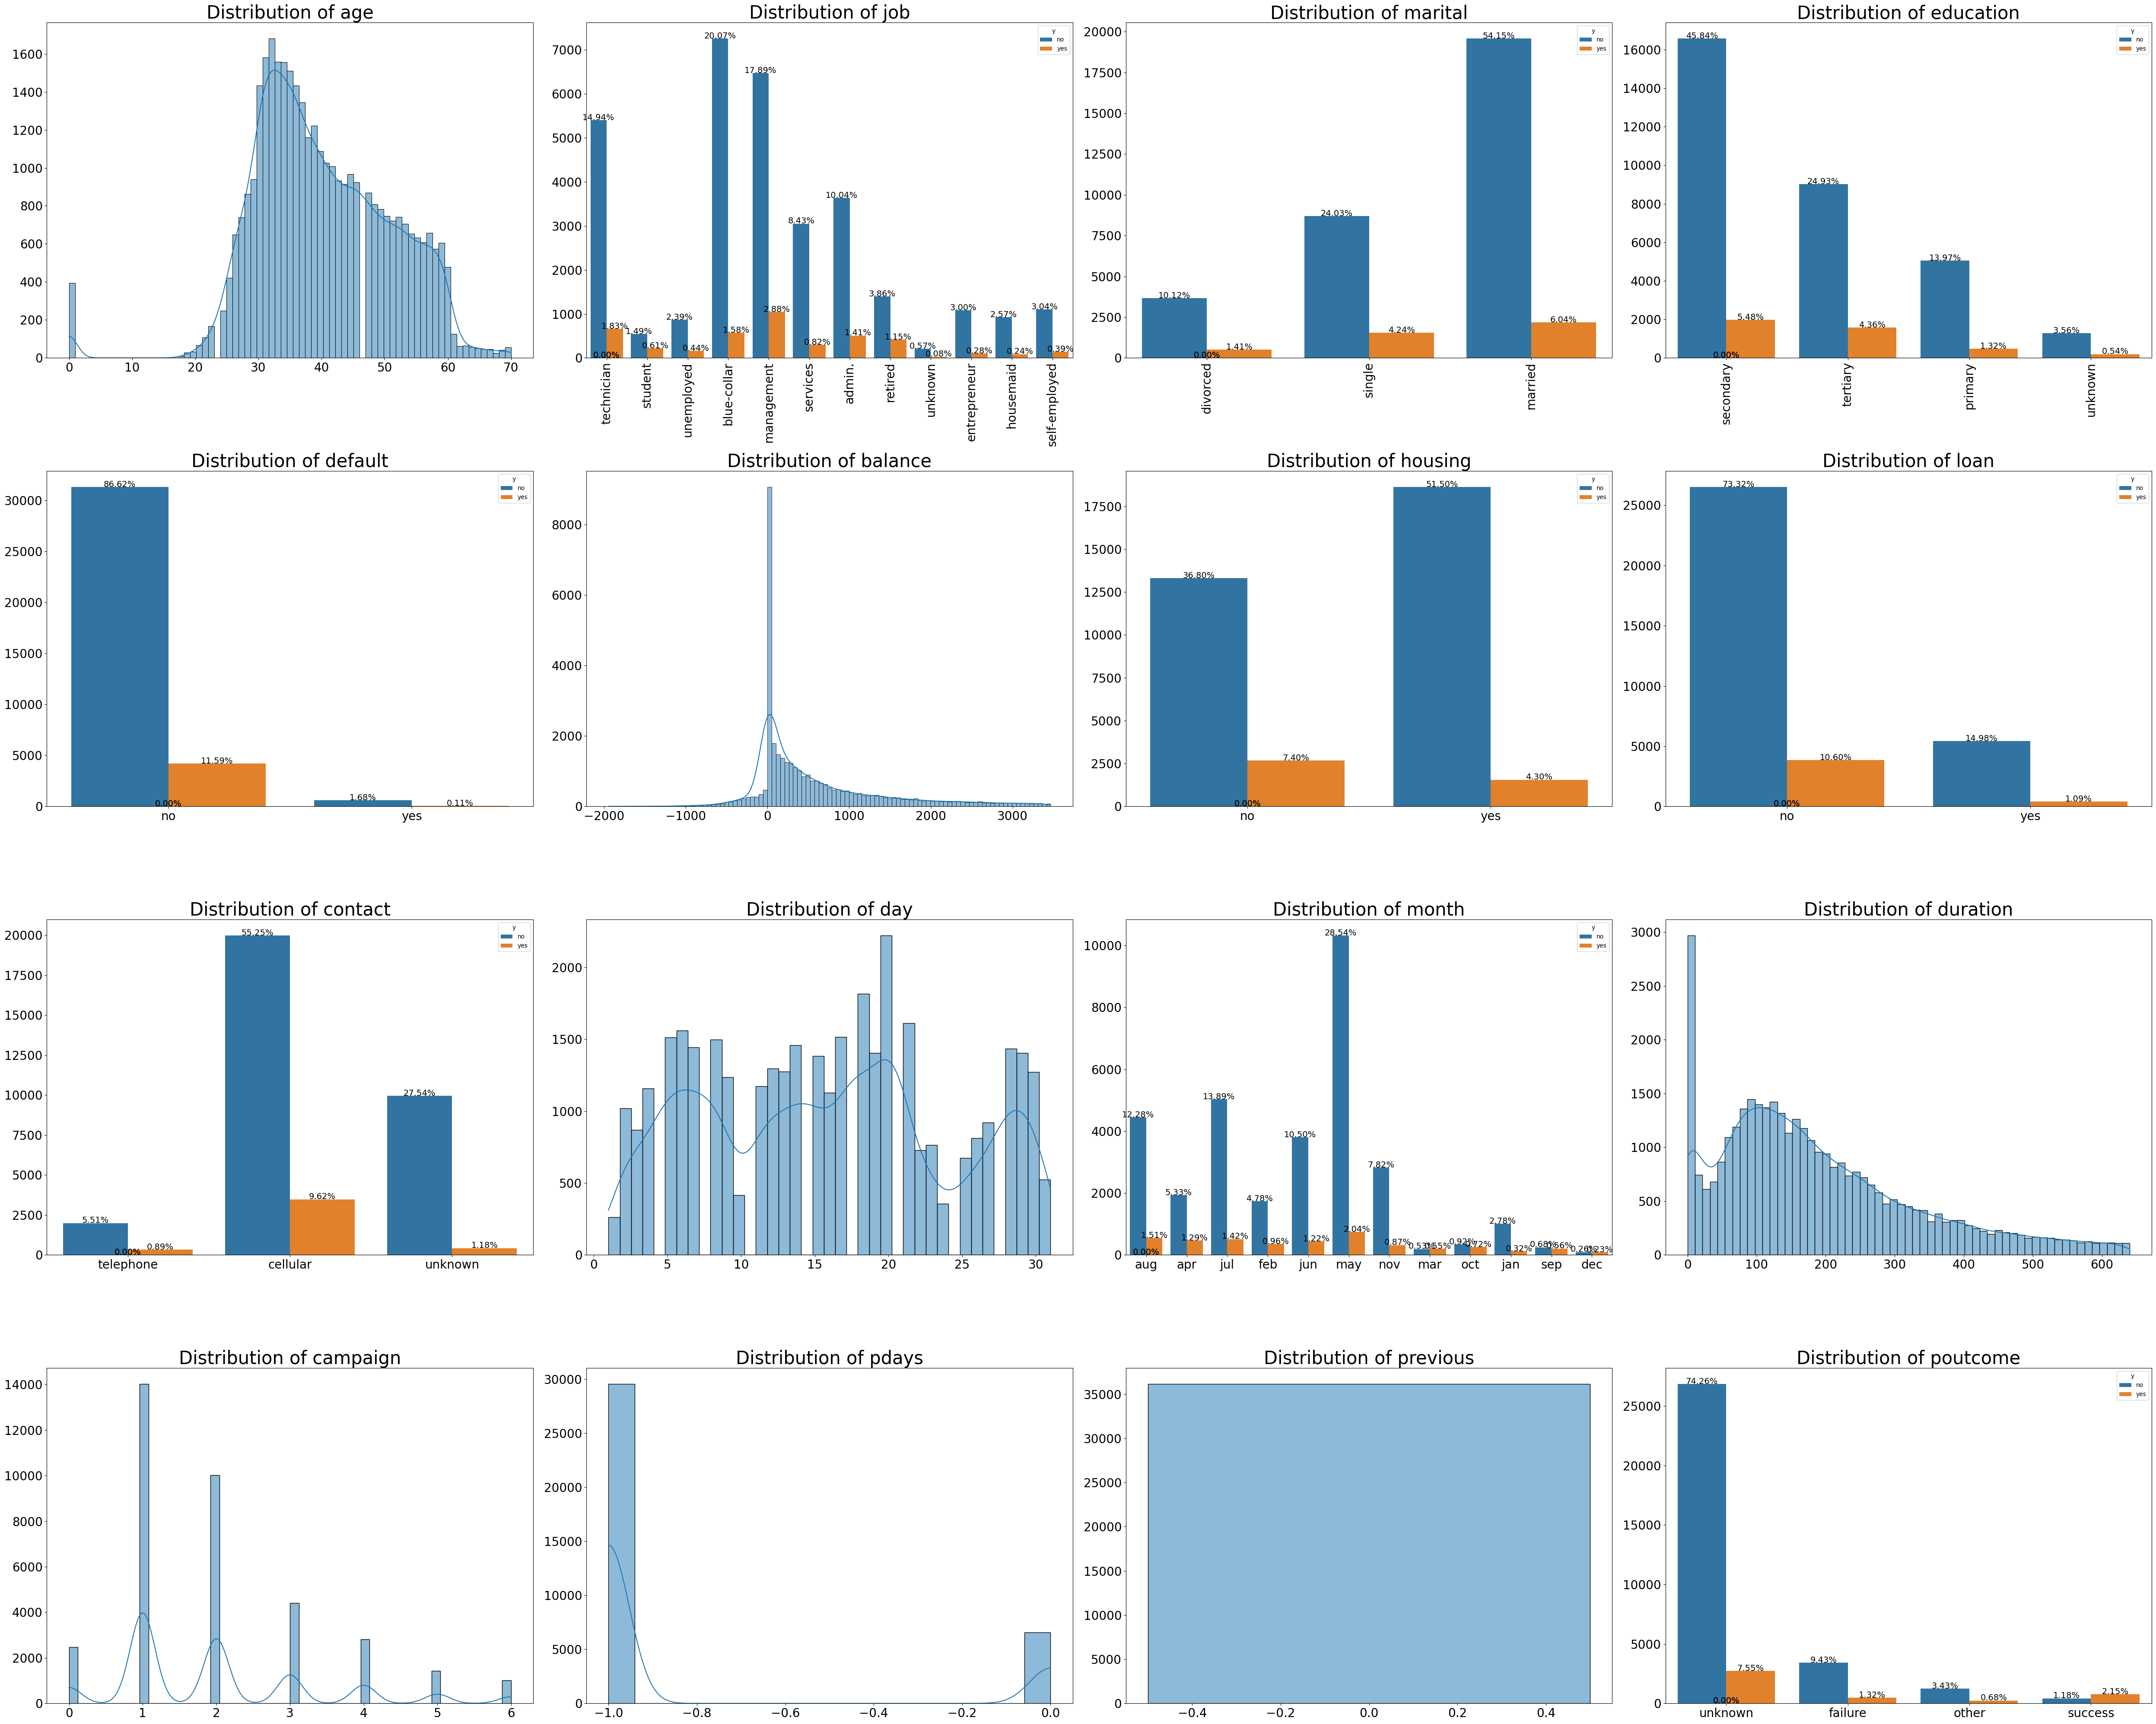

In [28]:
plot_dist_with_y(4,4,X_train_iqr,X_train,categorical_features_list,y_train)

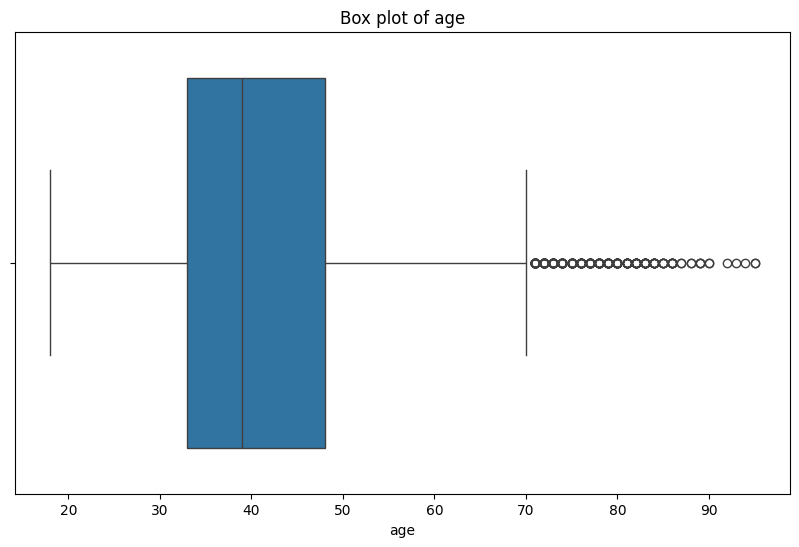

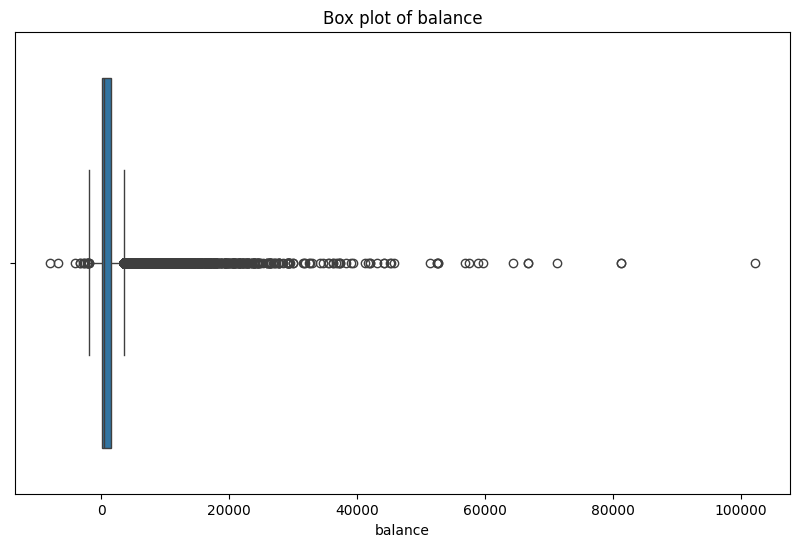

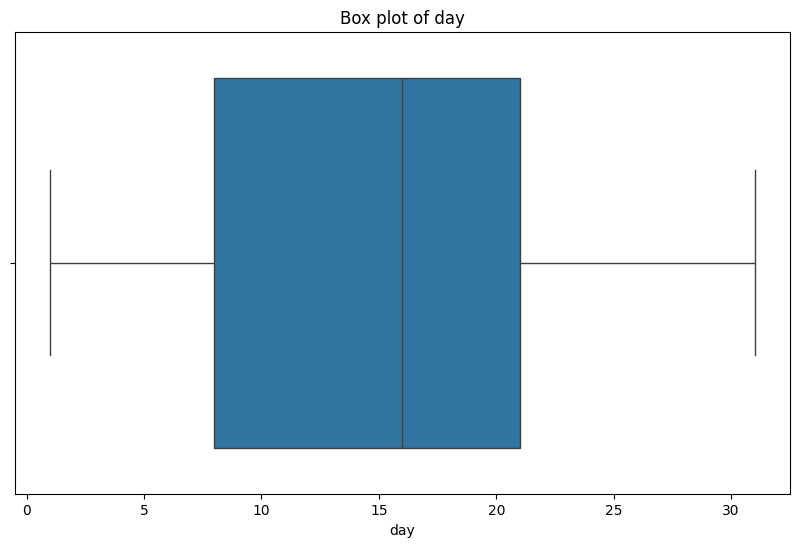

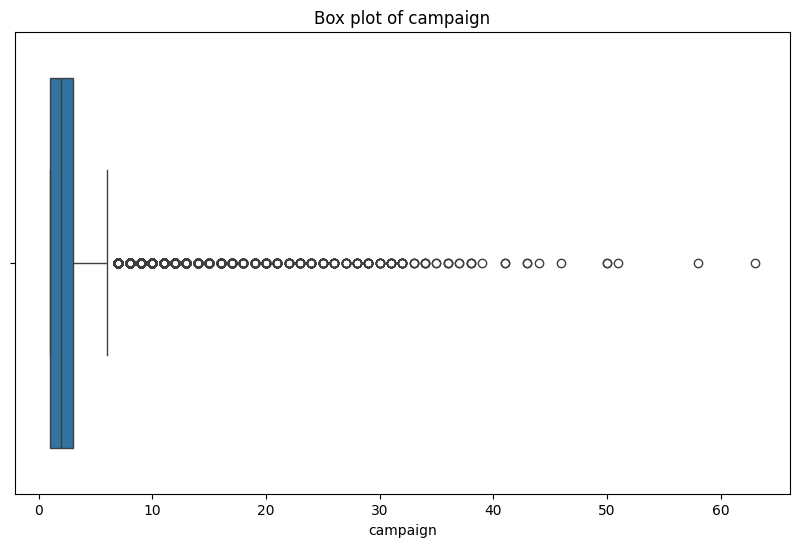

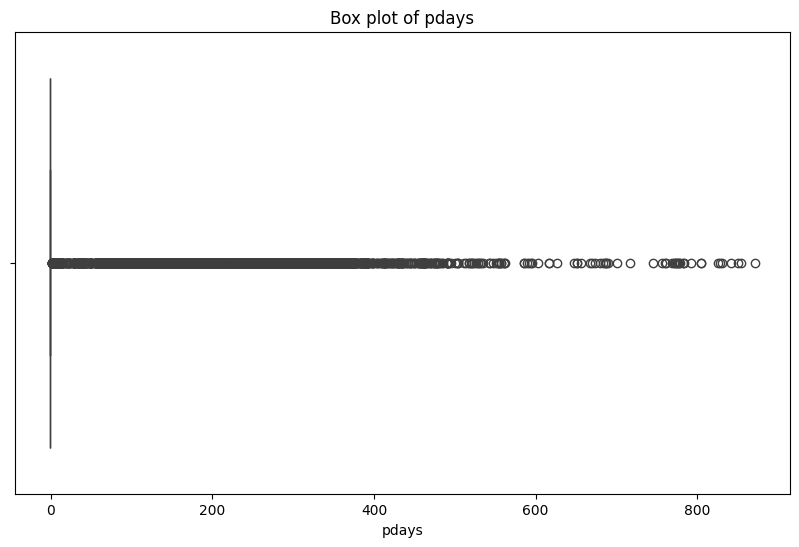

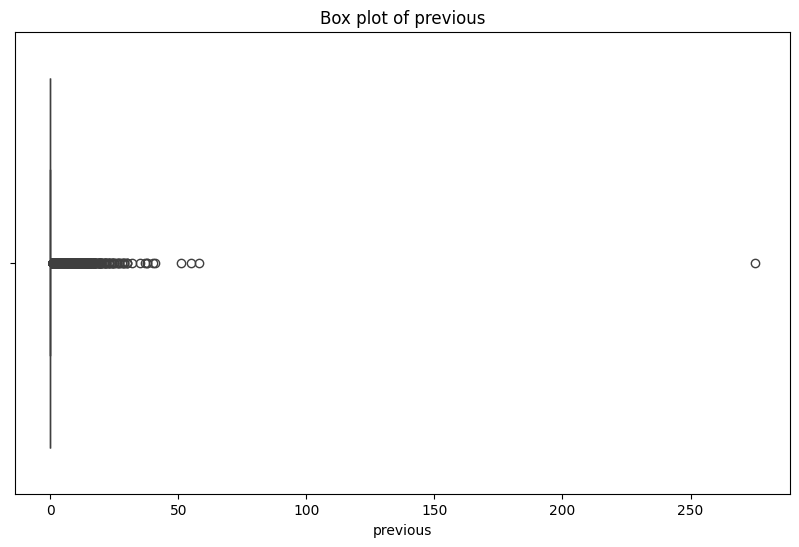

In [29]:
# List of numerical features
numeric_features = numeric_cols.columns

# Plotting the box plot to visualize the IQR, minimum, maximum (according to a thresold) and the outliers as hollow circles
# Using the numeric features as the categorical ones can't have outliers / extreme values
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=X_train[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()


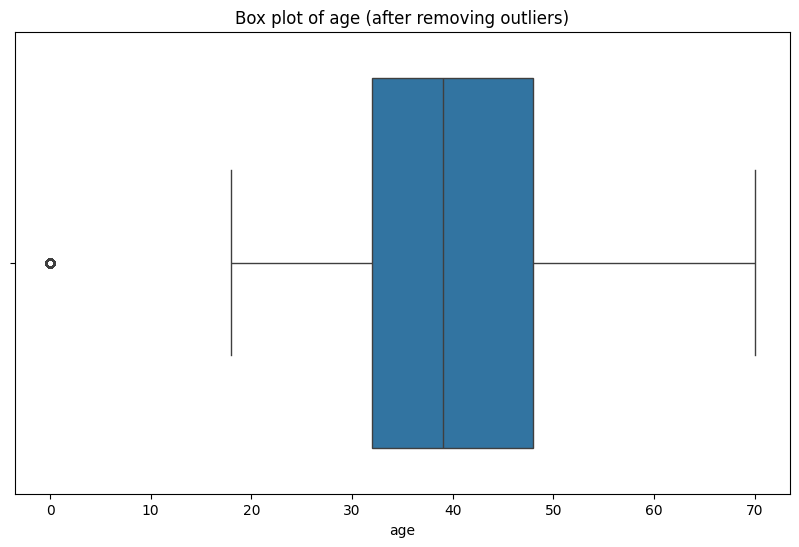

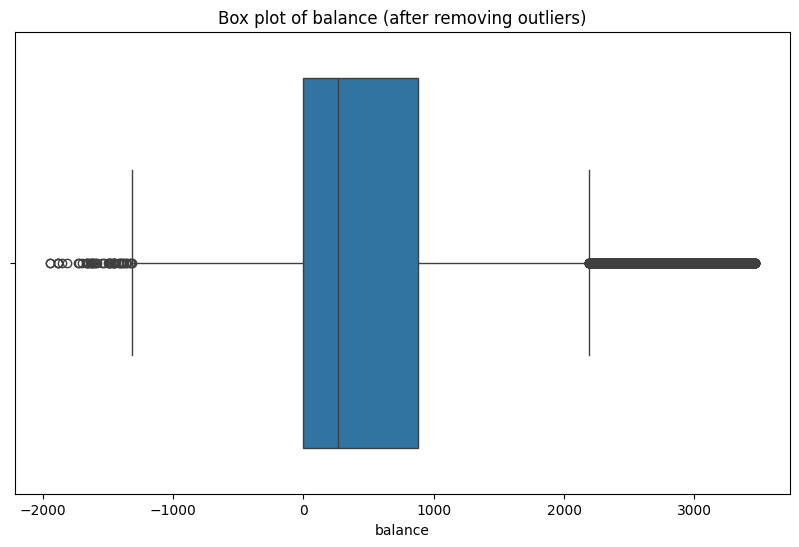

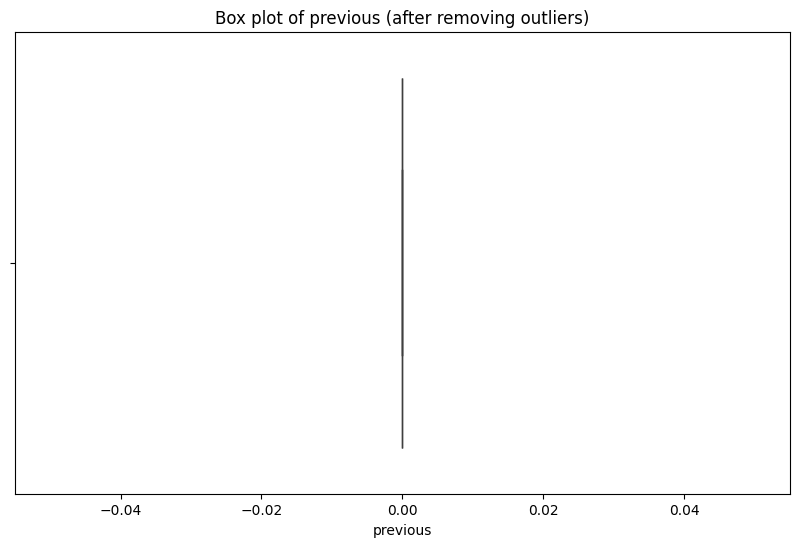

In [30]:
# Plotting after outliers removal
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=X_train_iqr[feature])
    plt.title(f'Box plot of {feature} (after removing outliers)')
    plt.show()


In [31]:
X_train_iqr[X_train_numeric.columns].describe()

age       balance           day      duration      campaign  \
count  36168.000000  36168.000000  36168.000000  36168.000000  36168.000000   
mean      40.056873    576.668381     15.817961    188.124585      1.983273   
std       10.778919    824.238948      8.331980    144.804681      1.376895   
min        0.000000  -1944.000000      1.000000      0.000000      0.000000   
25%       32.000000      0.000000      8.000000     82.000000      1.000000   
50%       39.000000    268.000000     16.000000    156.000000      2.000000   
75%       48.000000    876.000000     21.000000    264.000000      3.000000   
max       70.000000   3463.000000     31.000000    640.000000      6.000000   

              pdays  previous  
count  36168.000000   36168.0  
mean      -0.817961       0.0  
std        0.385882       0.0  
min       -1.000000       0.0  
25%       -1.000000       0.0  
50%       -1.000000       0.0  
75%       -1.000000       0.0  
max        0.000000       0.0

Removing the outliers should be done with caution and based on the domain knowledge, I'll inspect its effect on the model.

Now, applying the same transformation on the test dataset

In [6]:

# scaling the non categorical data and encoding the categorical ones
categorical = X_train.dtypes == object
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))
X_train_preprocessed = preprocess.fit_transform(X_train)
# X_train_preprocessed_iqr = preprocess.fit_transform(X_train_iqr)
X_test_preprocessed = preprocess.transform(X_test)


In [10]:
# Get the list of feature names after one-hot encoding for categorical features
ohe_feature_names = preprocess.named_transformers_['onehotencoder'].get_feature_names_out(input_features=categorical[categorical].index)

# Combine with numeric feature names
feature_names = list(numeric_cols.columns) + list(ohe_feature_names)

# Convert preprocessed data back to DataFrame
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)
# X_train_preprocessed_iqr_df = pd.DataFrame(X_train_preprocessed_iqr, columns=feature_names)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=feature_names)


In [34]:
X_train_preprocessed_df.head()

age   balance       day  duration  campaign     pdays  previous  \
0 -0.460434 -0.164410  1.582124 -0.457311 -0.246104 -0.410910 -0.241509   
1 -1.589641  0.899627 -1.298384  2.502493  0.398202  1.446096  2.664584   
2  0.292371 -0.365486 -0.458236  5.697691  0.398202 -0.410910 -0.241509   
3  0.668773 -0.445003  1.822166 -0.862499  2.653271 -0.410910 -0.241509   
4 -0.272233 -0.361249  1.222060 -0.777602  2.331118 -0.410910 -0.241509   

   job_admin.  job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  \
0         0.0              0.0               0.0  ...        0.0        0.0   
1         0.0              0.0               0.0  ...        0.0        0.0   
2         0.0              0.0               0.0  ...        0.0        0.0   
3         0.0              0.0               0.0  ...        0.0        0.0   
4         0.0              0.0               0.0  ...        0.0        0.0   

   month_may  month_nov  month_oct  month_sep  poutcome_failure  \
0        0.0        0.0        0.0        0.0               0.0   
1        0.0        0.0        0.0        0.0               1.0   
2        0.0        0.0        0.0        0.0               0.0   
3        0.0        0.0        0.0        0.0               0.0   
4        0.0        0.0        0.0        0.0               0.0   

   poutcome_other  poutcome_success  poutcome_unknown  
0             0.0               0.0               1.0  
1             0.0               0.0               0.0  
2             0.0               0.0               1.0  
3             0.0               0.0               1.0  
4             0.0               0.0               1.0  

[5 rows x 51 columns]

Applying on The Test Dataset: The scaling, outliers removal and encoding

Model Selection

In [35]:
# Plotting the correlation matrix
plt.figure(figsize=(60,60))
c_one_hot =  X_train_preprocessed_df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c_one_hot

age   balance       day  duration  campaign  \
age                  1.000000  0.096164 -0.009765 -0.004284  0.007818   
balance              0.096164  1.000000  0.002354  0.021114 -0.014405   
day                 -0.009765  0.002354  1.000000 -0.031352  0.161620   
duration            -0.004284  0.021114 -0.031352  1.000000 -0.086704   
campaign             0.007818 -0.014405  0.161620 -0.086704  1.000000   
pdays               -0.024410  0.003141 -0.093492 -0.006306 -0.088898   
previous             0.001832  0.017328 -0.049443 -0.000790 -0.031240   
job_admin.          -0.056519 -0.025747 -0.013123 -0.012662 -0.026868   
job_blue-collar     -0.043255 -0.045061 -0.021881  0.010873  0.009784   
job_entrepreneur     0.021167  0.011386 -0.000710 -0.001653  0.002900   
job_housemaid        0.085141 -0.002464  0.005499 -0.008219  0.004326   
job_management      -0.022111  0.064081  0.018785 -0.010883  0.018425   
job_retired          0.448183  0.045439 -0.010666  0.023515 -0.030551   
job_self-employed   -0.006284  0.018607  0.004122  0.008441  0.008529   
job_services        -0.067855 -0.039837 -0.006922  0.000776 -0.010316   
job_student         -0.196561  0.004168 -0.013228 -0.006842 -0.022203   
job_technician      -0.069438 -0.016058  0.033841 -0.008068  0.024682   
job_unemployed      -0.000399  0.010877 -0.008175  0.020155 -0.019562   
job_unknown          0.052021  0.012278 -0.012765 -0.007759  0.014025   
marital_divorced     0.164656 -0.021346  0.002952  0.007495 -0.013404   
marital_married      0.285231  0.021542  0.003425 -0.024051  0.032487   
marital_single      -0.426802 -0.008277 -0.005816  0.020826 -0.025806   
education_primary    0.197223 -0.013062 -0.024859 -0.001028  0.009767   
education_secondary -0.099703 -0.068939 -0.003918  0.002576 -0.020804   
education_tertiary  -0.078444  0.079653  0.021070 -0.001518  0.012739   
education_unknown    0.073401  0.014671  0.006642 -0.001142  0.005475   
default_no           0.018859  0.066333 -0.007856  0.011941 -0.013624   
default_yes         -0.018859 -0.066333  0.007856 -0.011941  0.013624   
housing_no           0.189143  0.067494  0.031700 -0.004452  0.022074   
housing_yes         -0.189143 -0.067494 -0.031700  0.004452 -0.022074   
loan_no              0.018716  0.085082 -0.011784  0.008520 -0.008179   
loan_yes            -0.018716 -0.085082  0.011784 -0.008520  0.008179   
contact_cellular    -0.067919  0.015132  0.022917  0.022769 -0.035392   
contact_telephone    0.172597  0.041231  0.021870 -0.019540  0.053944   
contact_unknown     -0.021753 -0.038280 -0.036015 -0.013447  0.008146   
month_apr           -0.030640  0.014205  0.049183  0.039299 -0.068209   
month_aug            0.076461  0.009028  0.031877 -0.037097  0.151377   
month_dec            0.027179  0.026518 -0.013638  0.015377 -0.013998   
month_feb            0.000630 -0.001679 -0.282445 -0.007016 -0.030141   
month_jan           -0.009305 -0.024182  0.248160  0.006016 -0.062235   
month_jul            0.003753 -0.063053  0.146653  0.015386  0.097886   
month_jun            0.051375  0.028785 -0.196299 -0.020890  0.046508   
month_mar            0.024426  0.024433 -0.016649 -0.004351 -0.017631   
month_may           -0.130828 -0.072315 -0.026145  0.007270 -0.065951   
month_nov            0.034741  0.116394  0.094493 -0.007824 -0.084776   
month_oct            0.061255  0.040872  0.031691  0.013234 -0.051262   
month_sep            0.028329  0.021135 -0.054542  0.012044 -0.036645   
poutcome_failure    -0.004224  0.011630 -0.068987 -0.018389 -0.088097   
poutcome_other      -0.023577  0.008380 -0.033777 -0.009300 -0.018873   
poutcome_success     0.035170  0.036334 -0.031964  0.040769 -0.058692   
poutcome_unknown    -0.000843 -0.030553  0.087643  0.000585  0.107758   

                        pdays  previous  job_admin.  job_blue-collar  \
age                 -0.024410  0.001832   -0.056519        -0.043255   
balance              0.003141  0.017328   -0.025747        -0.045061   
day          

Printing the pair of features that have a correlation higher than a spicific threshold

In [36]:
# Define the correlation threshold
threshold = 0.8

# Get the correlation matrix
corr_matrix = X_train_preprocessed_df.corr()

# Create a mask for values where the absolute correlation is above the threshold
mask = np.abs(corr_matrix) > threshold

# Get the pairs of features that have a correlation above the threshold
# Only consider pairs where i < j to avoid duplicate pairs and self-correlation
correlated_pairs = [(i, j) for i in range(len(mask)) for j in range(i+1, len(mask)) if mask.iloc[i, j]]

# Print the correlated pairs
for i, j in correlated_pairs:
    # Split the feature names by '_'
    i_split = corr_matrix.columns[i].split('_')[0]
    j_split = corr_matrix.columns[j].split('_')[0]
    
    # If the first part of the feature names are different, print the pair
    if i_split != j_split:
        print(f"The features '{corr_matrix.columns[i]}' and '{corr_matrix.columns[j]}' have a correlation of {corr_matrix.iloc[i, j]:.2f}")


The features 'pdays' and 'poutcome_unknown' have a correlation of -0.87


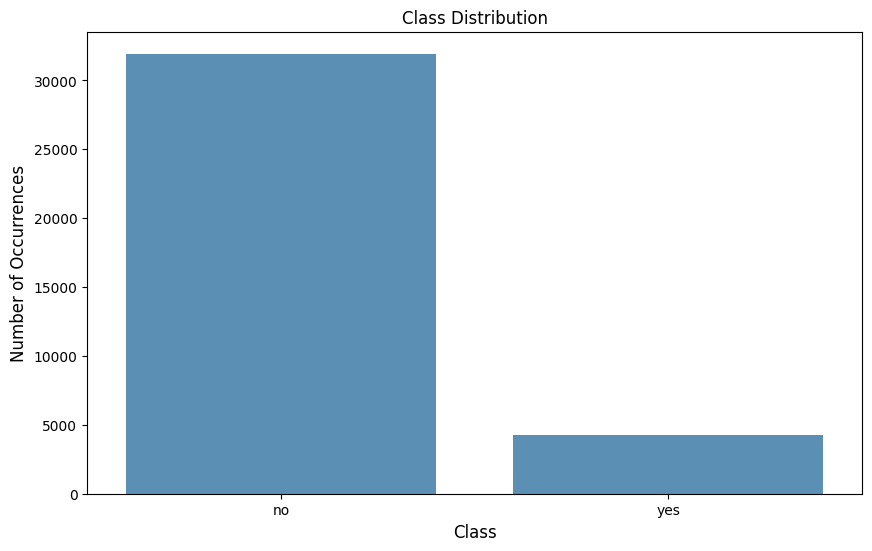

In [37]:
# Get class counts
class_counts = y_train.value_counts()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index, y=class_counts.values, alpha=0.8)

plt.title('Class Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.show()


As LogisticRegression() Module doesn't have the learning rate as a hyper parameter, I'll use SGDClassifier() with the loss parameter = 'log_loss'

In [38]:
type(y_train), type(y_test)

(pandas.core.series.Series, pandas.core.series.Series)

In [15]:
# Convert the Series to a DataFrame
y_train_df = y_train.to_frame()
y_test_df = y_test.to_frame()

y_train_df.head(), y_test_df.head()

(         y
 24001   no
 43409  yes
 20669  yes
 18810   no
 23130   no,
         y
 1392   no
 7518   no
 12007  no
 5536   no
 29816  no)

In [16]:
y_train_df_encoded = le.fit_transform(y_train_df)
y_test_df_encoded = le.fit_transform(y_test_df)

y_train_df_encoded, y_test_df_encoded

c:\Users\nouran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nouran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0, 1, 1, ..., 0, 0, 1]), array([0, 0, 0, ..., 0, 0, 0]))

First method to deal with classes imbalance, changing the classes weights

In [41]:
classifiers_part_2 = [SGDClassifier(loss='log_loss',penalty='l2',shuffle=True,n_jobs=-1,random_state=123),SGDClassifier(loss='log_loss',shuffle=True,n_jobs=-1,random_state=123)]
first_classifier_grid_search_params = {'alpha':[0.001,0.001,0.01,0.1],'learning_rate':['constant'],'eta0':[0.1,0.5,0.01,0.05,0.001,0.005],
                                       'class_weight':[None, 'balanced', {0:0.2, 1:0.8},{0:0.3, 1:0.7},{0:0.4,1:0.6}]}
second_classifier_grid_search_params = {'learning_rate':['constant'],'eta0':[0.1,0.5,0.01,0.05,0.001,0.005],
                                        'class_weight':[None, 'balanced', {0:0.2, 1:0.8},{0:0.3, 1:0.7},{0:0.4,1:0.6}]}

grids_part_2 = [first_classifier_grid_search_params,second_classifier_grid_search_params]
grid_searches_part_2_with_outliers = [GridSearchCV(clf, grid, n_jobs=-1, cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True), return_train_score=True).fit(X_train_preprocessed_df, y_train_df_encoded) for clf,grid in zip(classifiers_part_2,grids_part_2)]
grid_searches_part_2_without_outliers = [GridSearchCV(clf, grid, n_jobs=-1, cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True), return_train_score=True,error_score='raise',scoring='f1').fit(X_train_preprocessed_iqr_df, y_train_df_encoded) for clf,grid in zip(classifiers_part_2,grids_part_2)]

Inspecting the regularized classifier that was trained on the full training dataset

In [42]:
reg_clf_full = grid_searches_part_2_with_outliers[0].best_estimator_
reg_clf_full


SGDClassifier(alpha=0.001, class_weight={0: 0.4, 1: 0.6}, eta0=0.01,
              learning_rate='constant', loss='log_loss', n_jobs=-1,
              random_state=123)

In [43]:
# Best F1 score for the training dataset
grid_searches_part_2_with_outliers[0].best_score_

0.902206342302416

In [44]:
# Computing the scores of the test dataset, the accuracy
Acc_reg_clf_full = reg_clf_full.score(X_test_preprocessed_df,y_test_df_encoded)
print(f"Accuracy of reg_clf_full is {Acc_reg_clf_full:.2f}")
# F1 score
y_pred_reg_clf_full = reg_clf_full.predict(X_test_preprocessed_df)
f1 = f1_score(y_test_df_encoded, y_pred_reg_clf_full, average='binary')  # Use 'binary' for binary classification
print(f"F1 Score of reg_clf_full : {f1:.2f}")
# ROC AUC
y_score_reg_clf_full = reg_clf_full.predict_proba(X_test_preprocessed_df)[:, 1]  # Probability estimates of the positive class
roc_auc_reg_clf_full = roc_auc_score(y_test_df_encoded, y_score_reg_clf_full)
print(f"ROC AUC Score of reg_clf_full: {roc_auc_reg_clf_full:.2f}")

Accuracy of reg_clf_full is 0.77
F1 Score of reg_clf_full : 0.44
ROC AUC Score of reg_clf_full: 0.82


-----------------------------------------------------------------------------------------------------

Inspecting the regularized classifier that was trained on the training dataset after removing the outliers

In [45]:
reg_clf_iqr = grid_searches_part_2_without_outliers[0].best_estimator_
reg_clf_iqr

SGDClassifier(alpha=0.001, class_weight={0: 0.2, 1: 0.8}, eta0=0.005,
              learning_rate='constant', loss='log_loss', n_jobs=-1,
              random_state=123)

In [46]:
grid_searches_part_2_without_outliers[0].best_score_

0.4370435082682634

In [47]:
# Computing the scores of the test dataset, the accuracy
Acc_reg_clf_iqr = reg_clf_iqr.score(X_test_preprocessed_df,y_test_df_encoded)
print(f"Accuracy of reg_clf_iqr is {Acc_reg_clf_iqr:.2f}")
# F1 score
y_pred_reg_clf_iqr = reg_clf_iqr.predict(X_test_preprocessed_df)
f1 = f1_score(y_test_df_encoded, y_pred_reg_clf_iqr, average='binary')  # Use 'binary' for binary classification
print(f"F1 Score of reg_clf_iqr : {f1:.2f}")
# ROC AUCreg_clf_iqr
y_score_reg_clf_iqr = reg_clf_iqr.predict_proba(X_test_preprocessed_df)[:, 1]  # Probability estimates of the positive class
roc_auc_reg_clf_iqr = roc_auc_score(y_test_df_encoded, y_score_reg_clf_iqr)
print(f"ROC AUC Score of reg_clf_iqr: {roc_auc_reg_clf_full:.2f}")

Accuracy of reg_clf_iqr is 0.76
F1 Score of reg_clf_iqr : 0.42
ROC AUC Score of reg_clf_iqr: 0.82


-----------------------------------------------------------------------------------------------------

Inspecting the non regularized classifier that was trained on the full training dataset

In [48]:
non_reg_clf_full = grid_searches_part_2_with_outliers[1].best_estimator_
non_reg_clf_full

SGDClassifier(class_weight={0: 0.4, 1: 0.6}, eta0=0.005,
              learning_rate='constant', loss='log_loss', n_jobs=-1,
              random_state=123)

In [49]:
grid_searches_part_2_with_outliers[1].best_score_

0.9024552552100756

In [50]:
# Computing the scores of the test dataset, the accuracy
Acc_non_reg_clf_full = non_reg_clf_full.score(X_test_preprocessed_df,y_test_df_encoded)
print(f"Accuracy of non_reg_clf_full is {Acc_non_reg_clf_full:.2f}")
# F1 score
y_pred_non_reg_clf_full = non_reg_clf_full.predict(X_test_preprocessed_df)
f1 = f1_score(y_test_df_encoded, y_pred_non_reg_clf_full, average='binary')  # Use 'binary' for binary classification
print(f"F1 Score of non_reg_clf_full : {f1:.2f}")
# ROC AUCreg_clf_iqr
y_score_non_reg_clf_full= non_reg_clf_full.predict_proba(X_test_preprocessed_df)[:, 1]  # Probability estimates of the positive class
roc_auc_non_reg_clf_full = roc_auc_score(y_test_df_encoded, y_score_non_reg_clf_full)
print(f"ROC AUC Score of non_reg_clf_full: {roc_auc_non_reg_clf_full:.2f}")

Accuracy of non_reg_clf_full is 0.78
F1 Score of non_reg_clf_full : 0.45
ROC AUC Score of non_reg_clf_full: 0.82


-----------------------------------------------------------------------------------------------------

Inspecting the non regularized classifier that was trained on the training dataset after removing the outliers

In [51]:
non_reg_clf_iqr = grid_searches_part_2_without_outliers[1].best_estimator_
non_reg_clf_iqr

SGDClassifier(class_weight={0: 0.2, 1: 0.8}, eta0=0.005,
              learning_rate='constant', loss='log_loss', n_jobs=-1,
              random_state=123)

In [52]:
grid_searches_part_2_without_outliers[1].best_score_

0.44236738707328377

In [53]:
# Computing the scores of the test dataset, the accuracy
Acc_non_reg_clf_iqr = non_reg_clf_iqr.score(X_test_preprocessed_df,y_test_df_encoded)
print(f"Accuracy of non_reg_clf_iqr is {Acc_non_reg_clf_iqr:.2f}")
# F1 score
y_pred_non_reg_clf_iqr = non_reg_clf_iqr.predict(X_test_preprocessed_df)
f1 = f1_score(y_test_df_encoded, y_pred_non_reg_clf_iqr, average='binary')  # Use 'binary' for binary classification
print(f"F1 Score of reg_clf_iqr : {f1:.2f}")
# ROC AUCreg_clf_iqr
y_score_non_reg_clf_iqr= non_reg_clf_iqr.predict_proba(X_test_preprocessed_df)[:, 1]  # Probability estimates of the positive class
roc_auc_non_reg_clf_iqr = roc_auc_score(y_test_df_encoded, y_score_non_reg_clf_iqr)
print(f"ROC AUC Score of non_reg_clf_iqr: {roc_auc_non_reg_clf_iqr:.2f}")

Accuracy of non_reg_clf_iqr is 0.76
F1 Score of reg_clf_iqr : 0.43
ROC AUC Score of non_reg_clf_iqr: 0.80


-----------------------------------------------------------------------------------------------------

Second method to deal with classes imbalance, Oversampling, Undersampling and Random sampling

In [54]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed_df, y_train_df_encoded)

In [55]:
X_resampled

age   balance       day  duration  campaign     pdays  previous  \
0     -0.460434 -0.164410  1.582124 -0.457311 -0.246104 -0.410910 -0.241509   
1     -1.589641  0.899627 -1.298384  2.502493  0.398202  1.446096  2.664584   
2      0.292371 -0.365486 -0.458236  5.697691  0.398202 -0.410910 -0.241509   
3      0.668773 -0.445003  1.822166 -0.862499  2.653271 -0.410910 -0.241509   
4     -0.272233 -0.361249  1.222060 -0.777602  2.331118 -0.410910 -0.241509   
...         ...       ...       ...       ...       ...       ...       ...   
63869  0.827336 -0.466698 -0.167634  2.087900 -0.568256 -0.410910 -0.241509   
63870 -1.246495 -0.294649  0.099453  0.987332 -0.484936 -0.410910 -0.241509   
63871  1.629734 -0.404467  0.369186  2.098986 -0.042722 -0.410910 -0.241509   
63872 -1.598139 -0.009918  0.611115  0.251609 -0.568256  1.167834  0.626297   
63873 -0.741181 -0.282296  1.702145  0.162469 -0.568256 -0.410910 -0.241509   

       job_admin.  job_blue-collar  job_entrepreneur  ...  month_jun  \
0        0.000000         0.000000               0.0  ...        0.0   
1        0.000000         0.000000               0.0  ...        0.0   
2        0.000000         0.000000               0.0  ...        0.0   
3        0.000000         0.000000               0.0  ...        0.0   
4        0.000000         0.000000               0.0  ...        0.0   
...           ...              ...               ...  ...        ...   
63869    0.000000         1.000000               0.0  ...        0.0   
63870    0.000000         0.000000               0.0  ...        0.0   
63871    0.000000         0.000000               0.0  ...        0.0   
63872    0.000000         0.000000               0.0  ...        0.0   
63873    0.005506         0.994494               0.0  ...        0.0   

       month_mar  month_may  month_nov  month_oct  month_sep  \
0            0.0        0.0        0.0        0.0        0.0   
1            0.0        0.0        0.0        0.0        0.0   
2            0.0        0.0        0.0        0.0        0.0   
3            0.0        0.0        0.0        0.0        0.0   
4            0.0        0.0        0.0        0.0        0.0   
...          ...        ...        ...        ...        ...   
63869        0.0        1.0        0.0        0.0        0.0   
63870        0.0        0.0        0.0        0.0        0.0   
63871        0.0        0.0        1.0        0.0        0.0   
63872        0.0        0.0        0.0        0.0        0.0   
63873        0.0        0.0        0.0        0.0        0.0   

       poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown  
0                   0.0             0.0               0.0               1.0  
1                   1.0             0.0               0.0               0.0  
2                   0.0             0.0               0.0               1.0  
3                   0.0             0.0               0.0               1.0  
4                   0.0             0.0               0.0               1.0  
...                 ...             ...               ...               ...  
63869               0.0             0.0               0.0               1.0  
63870               0.0             0.0               0.0               1.0  
63871               0.0             0.0               0.0               1.0  
63872               0.0             0.0               1.0               0.0  
63873               0.0             0.0               0.0               1.0  

[63874 rows x 51 columns]

In [56]:
y_resampled


array([0, 1, 1, ..., 1, 1, 1])

In [17]:
classifiers_part_2_oversampling = [SGDClassifier(loss='log_loss',penalty='l2',shuffle=True,n_jobs=-1,random_state=123),SGDClassifier(loss='log_loss',shuffle=True,n_jobs=-1,random_state=123)]
first_classifier_grid_search_params = {'alpha':[0.001,0.001,0.01,0.1]}
                                    #    ,'learning_rate':['constant'],'eta0':[0.1,0.5,0.01,0.05,0.001,0.005],
                                    #    'class_weight':[None, 'balanced', {0:0.2, 1:0.8},{0:0.3, 1:0.7},{0:0.4,1:0.6}]}
second_classifier_grid_search_params = {'learning_rate':['constant'],'eta0':[0.1,0.5,0.01,0.05,0.001,0.005]}#,
                                        #'class_weight':[None, 'balanced', {0:0.2, 1:0.8},{0:0.3, 1:0.7},{0:0.4,1:0.6}]}

grids_part_2_oversampling = [first_classifier_grid_search_params,second_classifier_grid_search_params]
grid_searches_part_2_oversampling_with_outliers = [GridSearchCV(clf, grid, n_jobs=-1, cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True), return_train_score=True).fit(X_train_preprocessed_df, y_train_df_encoded) for clf,grid in zip(classifiers_part_2_oversampling,grids_part_2_oversampling)]
grid_searches_part_2_oversampling_without_outliers = [GridSearchCV(clf, grid, n_jobs=-1, cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True), return_train_score=True,error_score='raise',scoring='f1').fit(X_train_preprocessed_iqr_df, y_train_df_encoded) for clf,grid in zip(classifiers_part_2_oversampling,grids_part_2_oversampling)]

NameError: name 'X_train_preprocessed_iqr_df' is not defined

In [58]:
reg_clf_iqr_oversampling = grid_searches_part_2_oversampling_without_outliers[0].best_estimator_
reg_clf_iqr_oversampling

SGDClassifier(alpha=0.001, class_weight={0: 0.2, 1: 0.8}, eta0=0.005,
              learning_rate='constant', loss='log_loss', n_jobs=-1,
              random_state=123)

In [59]:
grid_searches_part_2_oversampling_without_outliers[0].best_score_

0.4370435082682634

In [60]:
# Computing the scores of the test dataset, the accuracy
Acc_reg_clf_iqr_oversampling = reg_clf_iqr_oversampling.score(X_test_preprocessed_df,y_test_df_encoded)
print(f"Accuracy of reg_clf_iqr_oversampling is {Acc_reg_clf_iqr_oversampling:.2f}")
# F1 score
y_pred_reg_clf_iqr_oversampling = reg_clf_iqr_oversampling.predict(X_test_preprocessed_df)
f1 = f1_score(y_test_df_encoded, y_pred_reg_clf_iqr_oversampling, average='binary')  # Use 'binary' for binary classification
print(f"F1 Score of reg_clf_iqr_oversampling : {f1:.2f}")
# ROC AUCreg_clf_iqr
y_score_reg_clf_iqr_oversampling= reg_clf_iqr_oversampling.predict_proba(X_test_preprocessed_df)[:, 1]  # Probability estimates of the positive class
roc_auc_reg_clf_iqr_oversampling = roc_auc_score(y_test_df_encoded, y_score_reg_clf_iqr_oversampling)
print(f"ROC AUC Score of reg_clf_iqr_oversampling: {roc_auc_reg_clf_iqr_oversampling:.2f}")

Accuracy of reg_clf_iqr_oversampling is 0.76
F1 Score of reg_clf_iqr_oversampling : 0.42
ROC AUC Score of reg_clf_iqr_oversampling: 0.80


The results are similar

-----------------------------------------------------------------------------------------------------

Based on F1 score, the best results is of the non regularized classifier that's trained on the full training dataset 

Interpreting the results using the confusion matrix

[[6259 1726]
 [ 250  808]]


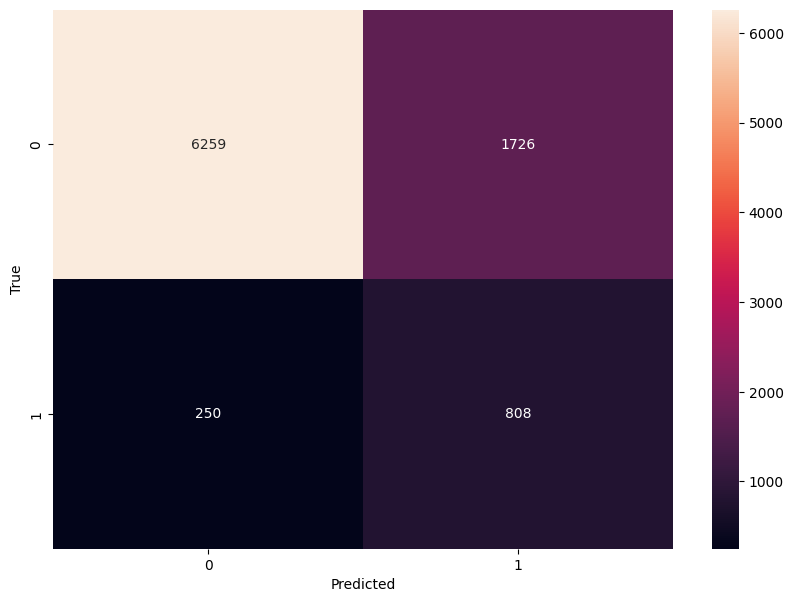

In [63]:

# Compute the confusion matrix
cm = confusion_matrix(y_test_df_encoded, y_pred_non_reg_clf_full)
print(cm)
# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()


This means that the model tends to predict the minority class (FP = 1726)